In [2]:
# Standard imports  ### (Put here built-in libraries - https://docs.python.org/3/library/)
import os

# Third party imports ### (Put here third-party libraries e.g. pandas, numpy)
import gudhi as gd # version 3.3.0
from gudhi.representations import Landscape # version 3.3.0
from gudhi.representations import BettiCurve # version 3.3.0
from gudhi.representations import TopologicalVector # version 3.3.0
from gudhi.representations import Entropy # version 3.3.0
#from mpire import WorkerPool # version 2.3.3
import numpy as np # version 1.20.3
from numpy import savez_compressed # version 1.20.3
import pandas as pd # version 1.4.1
from scipy.signal import find_peaks # version 1.6.2
from scipy.stats import kurtosis # version 1.6.2
from scipy.stats import skew # version 1.6.2
from scipy.stats import entropy # version 1.6.2
from sklearn import metrics # version 1.0.2
import tqdm # version 4.55.0

# Internal imports ### (Put here imports that are related to internal codes from the lab)
import TDA_Fernando

In [111]:
ls

Annotated_Data.xlsx
Edge_inf_AAL.ipynb
Figs/
Filtered_Corr_Matrixes/
HCP_AAL_Young_Adult/
HCPfMRI998.csv
IDsfMRI.txt
Males_test.csv
Males_train.csv
Organizing_Annot_Data.ipynb
P_value_Matrixes/
README.md
Split_HCP_YA_Data_Males_and_Females.ipynb
TDA_Fernando.py
TDA_features_HCP_YA.py
Untitled.ipynb
YA_Calculate_con_matrices_pvalued_filtered.py
__pycache__/
nohup.out
random_matrices/


In [3]:
def import_data(path_dir):
    """Makes list of all connectivity matrices to include
    
    
    Parameters
    ----------
    path_dir: path to directory with all connectivity matrices
        
    
    Returns
    -------
    data: list containing all names of connectivity matrices
        
    """
    data = []
    for filename in os.listdir(path_dir):
        data.append(filename)

    return data



In [28]:
ls

Annotated_Data.xlsx
Edge_inf_AAL.ipynb
Figs/
Filtered_Corr_Matrixes/
HCP_AAL_Young_Adult/
HCPfMRI998.csv
IDsfMRI.txt
Males_test.csv
Males_train.csv
Organizing_Annot_Data.ipynb
P_value_Matrixes/
README.md
Split_HCP_YA_Data_Males_and_Females.ipynb
TDA_Fernando.py
TDA_features_HCP_YA.py
Untitled.ipynb
YA_Calculate_con_matrices_pvalued_filtered.py
__pycache__/
nohup.out
random_matrices/


In [40]:
import glob
import matplotlib.pyplot as plt

In [29]:
files = glob.glob('Filtered_Corr_Matrixes/*.txt')

In [30]:
#files

['Filtered_Corr_Matrixes/Filtered_p_values_subj_634748_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_155635_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_126628_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_210617_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_124422_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_217126_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_987074_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_138332_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_594156_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_891667_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_186040_functional_connectivity.txt',
 'Filtered_Corr_Matrixes/Filtered_p_values_subj_298455_functional

In [179]:
import pandas as pd
Cohort=[]
for i in range(0,len(files)):
    df=pd.read_csv(files[i],header=None,sep=' ')
    #df = df.iloc[:-1 , :]
    # if needed, some cleaning step could be done in this stage here
    Cohort.append(df.to_numpy())

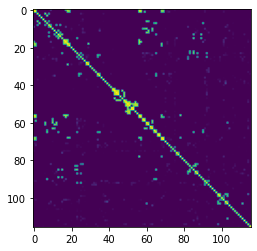

In [49]:
plt.imshow(Cohort[7],cmap='viridis')

In [8]:
#files

In [23]:
Data=[]
for i in range(0,len(files)):
    Data.append(np.loadtxt('Filtered_Corr_Matrixes/'+files[i]))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [20]:
Data[0]

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.803722,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.064615,0.000000,0.066680,0.000000
1,0.803722,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011848,0.000000
2,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.677843,0.000000,...,0.000000,0.000000,0.0,0.079877,0.000000,0.000000,0.043396,0.091706,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.017981,...,0.000000,0.000000,0.0,0.000000,0.802853,1.000000,0.607094,0.000000,0.000000,0.035732
112,0.064615,0.000000,0.0,0.0,0.043396,0.0,0.0,0.0,0.030226,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.607094,1.000000,0.000000,0.000000,0.002522
113,0.000000,0.000000,0.0,0.0,0.091706,0.0,0.0,0.0,0.032011,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
114,0.066680,0.011848,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [68]:
def calculate_betti_curves(pers_per_dim):
    """ Calculates Betti curves per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
        
    
    Returns
    -------
    betti_curves: list of Betti curves per dimension
         
        
    """

    betti_curves = BettiCurve(resolution=resolution,
                              sample_range=[0, 1]).transform(pers_per_dim)

    return betti_curves

In [52]:
import os

# Third party imports ### (Put here third-party libraries e.g. pandas, numpy)
import gudhi as gd # version 3.3.0
from gudhi.representations import Landscape # version 3.3.0
from gudhi.representations import BettiCurve # version 3.3.0
from gudhi.representations import TopologicalVector # version 3.3.0
from gudhi.representations import Entropy # version 3.3.0
#from mpire import WorkerPool # version 2.3.3
import numpy as np # version 1.20.3
from numpy import savez_compressed # version 1.20.3
import pandas as pd # version 1.4.1
from scipy.signal import find_peaks # version 1.6.2
from scipy.stats import kurtosis # version 1.6.2
from scipy.stats import skew # version 1.6.2
from scipy.stats import entropy # version 1.6.2
from sklearn import metrics # version 1.0.2
#import tqdm # version 4.55.0

In [59]:
def calculate_persistence(matrix):
    """ Performs filtration (persistent homology) process 
    
    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
        
    
    Returns
    -------
    pers: persistence of simplicial complex. 
          Type:list of pairs(dimension, pair(birth, death))
    simplex_tree: data structure for representing simplicial complexes
        
        
    """
    rips_complex = gd.RipsComplex(distance_matrix=matrix, max_edge_length=1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=nr_dimensions)
    pers = simplex_tree.persistence()

    return pers, simplex_tree



In [61]:
def persistence_per_dim(simplex_tree, nr_dimension):
    """ Performs filtration (persistent homology) process per dimension
    
    
    Parameters
    ----------
    simplex_tree: data structure for representing simplicial complexes
    nr_dimension: parameter which specifies the number of dimensions to 
        investigate. E.g. 1, 2 or 3. 
    
        
    Returns
    -------
    pers_per_dim: persistence of simplicial complex per dimension. E.g., if 
        3 dimensions: list of 3 lists of pairs(dimension, pair(birth, death))
    
    
    Notes
    -------
    Infinite values likely exist in the filtration process, because some 
    structures never cease existing. This leads to problems for computing 
    TDA metrics per dimension. Therefore, infinite values are substituted
    for the maximum finite values for other structures in the persistence
    in the same dimension. 
    
        
    """

    pers_per_dim = []



In [114]:
matrix = Cohort[0]

In [115]:
nr_dimensions=3

In [116]:
pers, simplex_tree = calculate_persistence(matrix)

In [107]:
pers_per_dim = persistence_per_dim(simplex_tree, nr_dimensions)

In [108]:
simplex_tree

In [109]:
betti_curves = BettiCurve(resolution=100,
                              sample_range=[0, 1]).transform(pers_per_dim)

TypeError: 'NoneType' object is not iterable

In [110]:
betti_curves = calculate_betti_curves(pers_per_dim)

TypeError: 'NoneType' object is not iterable

In [ ]:
BettiCurve

In [62]:
# Import and preproces connectivity matrix


    # Perform persistence and persistence per dimension


    
    # Calculate Betti curves and save area under curve
betti_curves = calculate_betti_curves(pers_per_dim)
#outcomes_to_export = calculate_betti_curves_AUC(betti_curves)

TypeError: 'NoneType' object is not iterable

In [58]:
resolution=100
calculate_betti_curves(2)

TypeError: 'int' object is not iterable

In [113]:
def euler_carac_curva(simplex_tree, min_val, max_val):
    euler_carac = 0.0
    dist_filt = 0.0
    euler_carac_list = []
    betti_num_list = []
    dist_filt_list = []
    st_aux = gd.SimplexTree()
    st_gf = simplex_tree.get_filtration()
#toma cada simplex de simplex_tree e seu valor de filtragem
#se o valor da filtragem muda, o c digo calcula os n meros de Betti de st_aux
#e armazena numa lista com o valor da filtragem, e muda dist_filt para o novo
#67
#valor.
    for val in st_gf:
        if val[1] > max_val:
            break
    else:
        if val[1] > min_val and dist_filt != val[1]:
            st_aux.persistence()
            betti_numbers = st_aux.betti_numbers()
            betti_num_list.append(betti_numbers)
            #Soma alternada dos n meros de Betti.
            for j in range(len(betti_numbers)):
                euler_carac += ((-1)**j)*betti_numbers[j]
            euler_carac_list.append(euler_carac)
            dist_filt_list.append(dist_filt)
            euler_carac = 0
#insere o  ltimo val em st_aux
    st_aux.insert(val[0],val[1])
    dist_filt = val[1]
    return dist_filt_list, euler_carac_list, betti_num_list

In [119]:
euler_carac_curva(simplex_tree, 0,10)

([0.0], [0.0], [[]])

In [120]:
# Set variables
nr_dimensions = 2 # number of dimensions in filtration process to analyze
resolution = 100 # resolution for calculating area under curve
curvatures_to_plot = [0.005, 0.01, 0.02, 0.05] # fixed densities for plotting
# curvatures_to_plot = [0.005, 0.01]
# and calculating curvatures
density_Euler = 100 # the maximum density of density range to calculate Euler
# density_Euler = 10

In [121]:
def calculate_persistence(matrix):
    """ Performs filtration (persistent homology) process 
    
    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
        
    
    Returns
    -------
    pers: persistence of simplicial complex. 
          Type:list of pairs(dimension, pair(birth, death))
    simplex_tree: data structure for representing simplicial complexes
        
        
    """
    rips_complex = gd.RipsComplex(distance_matrix=matrix, max_edge_length=1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=nr_dimensions)
    pers = simplex_tree.persistence()

    return pers, simplex_tree


def persistence_per_dim(simplex_tree, nr_dimension):
    """ Performs filtration (persistent homology) process per dimension
    
    
    Parameters
    ----------
    simplex_tree: data structure for representing simplicial complexes
    nr_dimension: parameter which specifies the number of dimensions to 
        investigate. E.g. 1, 2 or 3. 
    
        
    Returns
    -------
    pers_per_dim: persistence of simplicial complex per dimension. E.g., if 
        3 dimensions: list of 3 lists of pairs(dimension, pair(birth, death))
    
    
    Notes
    -------
    Infinite values likely exist in the filtration process, because some 
    structures never cease existing. This leads to problems for computing 
    TDA metrics per dimension. Therefore, infinite values are substituted
    for the maximum finite values for other structures in the persistence
    in the same dimension. 
    
        
    """

    pers_per_dim = []

    for dimension in range(nr_dimensions):
        pers = simplex_tree.persistence_intervals_in_dimension(dimension)

        # The code below replaces any infinite values with the maximum value
        # from the persistence in dimension 0.

        # Find the maximum value which is not infinite
        if dimension == 0:
            pers = np.where(np.isinf(pers), -1, pers)
            max_val_dim0 = np.max(pers)

        # If non-empty array: replace infinite with maximum value
        if pers.shape != (0,):
            pers = np.where(np.isinf(pers), -1, pers)
            pers = np.where(pers == -1, max_val_dim0, pers)
            pers_per_dim.append(pers)

        # if no topological structures present, append empty array to prevent error
        else:
            pers_per_dim.append(np.zeros([0, 2]))

    return pers_per_dim


def calculate_betti_curves(pers_per_dim):
    """ Calculates Betti curves per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
        
    
    Returns
    -------
    betti_curves: list of Betti curves per dimension
         
        
    """

    betti_curves = BettiCurve(resolution=resolution,
                              sample_range=[0, 1]).transform(pers_per_dim)

    return betti_curves


def calculate_betti_curves_AUC(betti_curves):
    """ Calculates area under curve (AUC) for Betti curve per dimension

    
    Parameters
    ----------
    betti_curves: list of Betti curves
    resolution: integer for the number of samples to take AUC of 
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
        Betti curve AUC is added as column per dimension
         
        
    """
    for i in range(nr_dimensions):
        betti_curve_AUC = metrics.auc(
            np.linspace(0, resolution, num=resolution), betti_curves[i])
        outcomes_to_export[f'bc_AUC_dim{i}'] = betti_curve_AUC

    return outcomes_to_export


def calculate_persistence_landscape(pers_per_dim):
    """ Calculates persistence landscape per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
        
    
    Returns
    -------
    landscapes: list of persistence landscape per dimension
         
        
    """
    
    landscapes = Landscape(num_landscapes=1,
                           resolution=resolution).fit_transform(pers_per_dim)

    return landscapes


def calculate_persistence_landscape_AUC(landscapes):
    """ Calculates area under curve (AUC) for persistence landscapes
    per dimension

    
    Parameters
    ----------
    landscapes: list of persistence landscape per dimension
    resolution: integer for the number of samples to take AUC of 
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
        persistence landscaoe AUC is added as column per dimension
         
        
    """

    for i in range(nr_dimensions):
        landscape_AUC = metrics.auc(
            np.linspace(0, resolution, num=resolution), landscapes[i])
        outcomes_to_export[f'pl_AUC_dim{i}'] = landscape_AUC

    return outcomes_to_export


def calculate_TopologicalVector(pers_per_dim):
    """ Calculates topological vector per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
        topological vector is added as column per dimension
         
        
    """
    for i in range(nr_dimensions):
        # If no topolofical components present, set to 0 to prevent errors
        if pers_per_dim[i].size == 0:
            outcomes_to_export[f'top_vec_dim{i}'] = 0

        else:
            pers = [pers_per_dim[i]]
            tv = TopologicalVector(threshold=1).transform(pers)
            outcomes_to_export[f'top_vec_dim{i}'] = float(tv)

    return outcomes_to_export


def calculate_ShannonEntropy(pers_per_dim):
    """ Calculates Shannon entropy per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
         shannon entropy is added as column per dimension
         
        
    """
    for i in range(nr_dimensions):
        # If no topolofical components present, set to 0 to prevent errors
        if pers_per_dim[i].size == 0:
            outcomes_to_export[f'S_entropy_dim{i}'] = 0

        else:
            pers = [pers_per_dim[i]]
            entropy = Entropy(mode='scalar').fit_transform(pers)
            outcomes_to_export[f'S_entropy_dim{i}'] = float(entropy)

    return outcomes_to_export


def calculate_EulerCharaceristic(matrix, person, max_density):
    """ Calculates Euler characteristic across a density range

    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
    person: name of person, needed for exporting data
    max_density: integer which sets the max of the density range for the Euler
        function
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
         The sum of the Euler characteristic per person, the total number of 
         cliques and total number of triangles are added as a column
         per person
    outcomes_to_plot: dictionary with outcomes to be exported which can be 
        plotted later using a Jupyter Notebook. 
    Euler: list of all Euler values across the density range 
        
    
    """
    outcomes = TDA_Fernando.Eulerange_dens(matrix, max_density)

    Euler = [i[0] for i in outcomes]
    total_cliques = [i[1] for i in outcomes]
    triangles = [i[5] for i in outcomes]

    outcomes_to_plot[f'Eulerrange_d{max_density}_{person[4:10]}'] = Euler

    outcomes_to_export['Euler_sum'] = sum(Euler)
    outcomes_to_export['total_cliques_sum'] = sum(total_cliques)
    outcomes_to_export['triangles_sum'] = sum(triangles)

    return outcomes_to_export, outcomes_to_plot, Euler


def calculate_curvature(matrix, person, *args, **kwargs):
    """ Calculates node curvatures at certain density values

    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
    person: name of person, needed for exporting data
    args: list of density values at which the sample the curvature values
    kwargs: dictionary with density values which are sampled at 
        (a distance to) a phase transition. This means that each person 
        will then have a different density value for sampling. 
        Values: density values. Keys: name of density value. E.g. p1: first
        phase transition, or p2: second phase transition. 
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
         curvature mean, standard deviation, kurtosis, skewness and entropy
         are added, either for all nodes, or DMN nodes, or FPN nodes. 
    outcomes_to_plot: dictionary with outcomes to be exported which can be 
        plotted later using a Jupyter Notebook. 
        
    
    """
    
    # Make dictionary for looping through all nodes, only DMN nodes, 
    # or only FPN nodes
    all_nodes = range(0, matrix.shape[0])
    dict_to_loop = {"all": all_nodes, "DMN": DMN, "FPN": FPN}

    # loop through fixed density values
    for dens in args:
        # calculate curvature at density value
        curv = TDA_Fernando.Curv_density(dens, matrix)
        # export for plotting
        outcomes_to_plot[f'curv_d{dens}_{person[4:10]}'] = curv
        # calculate curvature outcomes (mean, sandard deviation, kurtosis, 
        # skewness, entropy) for all nodes, DMN nodes and FPN nodes
        for k, v in dict_to_loop.items():
            outcomes_to_export[f'curv_mean_{k}_{dens}'] = curv[v].mean()
            outcomes_to_export[f'curv_std_{k}_{dens}'] = np.std(curv[v])
            outcomes_to_export[f'curv_kur_{k}_{dens}'] = kurtosis(curv[v])
            outcomes_to_export[f'curv_skew_{k}_{dens}'] = skew(curv[v])
            outcomes_to_export[f'curv_ent_{k}_{dens}'] = entropy(abs(curv[v]))

    # Loop through kwargs separately to prevent overwriting other variables.
    for name, dens in kwargs.items():
        curv = TDA_Fernando.Curv_density(dens, matrix)
        for k, v in dict_to_loop.items():
            outcomes_to_export[f'curv_mean_{k}_{name}'] = curv[v].mean()
            outcomes_to_export[f'curv_std_{k}_{name}'] = np.std(curv[v])
            outcomes_to_export[f'curv_kur_{k}_{name}'] = kurtosis(curv[v])
            outcomes_to_export[f'curv_skew_{k}_{name}'] = skew(curv[v])
            outcomes_to_export[f'curv_ent_{k}_{name}'] = entropy(abs(curv[v]))

    return outcomes_to_export, outcomes_to_plot


def calculate_cliques(matrix, clique_nr, *args, **kwargs):
    """ Calculates participation for DMN and FPN in n-cliques
    at chosen density values

    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
    clique_nr: integer value which sets the value for n. E.g.: 3 means
        that participation in 3-cliques/triangles is counted for each node
        in the network
    args: list of density values at which the sample the curvature values
    kwargs: dictionary with density values which are sampled at 
        (a distance to) a phase transition. This means that each person 
        will then have a different density value for sampling. 
        Values: density values. Keys: name of density value. E.g. p1: first
        phase transition, or p2: second phase transition. 
    
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
         Participation in n-cliques is measured for DMN and FPN, is exported
         as the sum of participation in cliques and the entropy
        
    
    """
    
    for dens in args:
        # If dens is 0, set outcomes at 0 to prevent errors
        if dens == 0:
            p_cliques_sum_DMN = 0
            p_cliques_sum_FPN = 0
            DMN_clique_entropy = 0
            FPN_clique_entropy = 0
        else:
            # calculate particpation in cliques
            part_cliques = TDA_Fernando.Participation_in_cliques(dens,
                                                                 matrix,
                                                                 clique_nr,
                                                                 verbose=False)
            p_cliques_sum_DMN = part_cliques[DMN].sum()
            p_cliques_sum_FPN = part_cliques[FPN].sum()
            DMN_clique_entropy = p_cliques_sum_DMN * np.log(p_cliques_sum_DMN)
            FPN_clique_entropy = p_cliques_sum_FPN * np.log(p_cliques_sum_FPN)

        outcomes_to_export[f"p{clique_nr}cliques_DMN_ent_{dens}"] = DMN_clique_entropy
        outcomes_to_export[f"p{clique_nr}cliques_FPN_ent_{dens}"] = FPN_clique_entropy
        outcomes_to_export[f"p{clique_nr}cliques_DMN_sum_{dens}"] = p_cliques_sum_DMN
        outcomes_to_export[f"p{clique_nr}cliques_FPN_sum_{dens}"] = p_cliques_sum_FPN
    
    # Deo separately for kwargs to prevent overwriting other variables
    for name, dens in kwargs.items():
        if dens == 0:
            p_cliques_sum_DMN = 0
            p_cliques_sum_FPN = 0
            DMN_clique_entropy = 0
            FPN_clique_entropy = 0
        else:
            part_cliques = TDA_Fernando.Participation_in_cliques(dens,
                                                                 matrix,
                                                                 clique_nr,
                                                                 verbose=False)
            p_cliques_sum_DMN = part_cliques[DMN].sum()
            p_cliques_sum_FPN = part_cliques[FPN].sum()
            DMN_clique_entropy = p_cliques_sum_DMN * np.log(p_cliques_sum_DMN)
            FPN_clique_entropy = p_cliques_sum_FPN * np.log(p_cliques_sum_FPN)

        outcomes_to_export[f"p{clique_nr}cliques_DMN_ent_{name}"] = DMN_clique_entropy
        outcomes_to_export[f"p{clique_nr}cliques_FPN_ent_{name}"] = FPN_clique_entropy
        outcomes_to_export[f"p{clique_nr}cliques_DMN_sum_{name}"] = p_cliques_sum_DMN
        outcomes_to_export[f"p{clique_nr}cliques_FPN_sum_{name}"] = p_cliques_sum_FPN

    return outcomes_to_export


def preprocess_matrix(path_data, person):
    """ Imports and preprocesses connectivity matrix
    
    
    Parameters
    ----------
    path_data: path to location of all connectivity matrices
    person: name of current person from data
    
    Returns
    -------
    matrix: preprocessed matrix as numpy array
     
    
    Notes
    -------
    If still present, any subcortical areas are deleted. Matrix is then 
    absolutized and converted to distance matrix, and diagonal filled with 1. 
    And short quality check: matrix with NaN values are printed. 
    
    """   
    
    # Import connectivity matrix
    matrix = import_cmatrix(path_data, person)

    # Remove subcortical regions
    matrix = np.delete(matrix, subcortical, axis=0)
    matrix = np.delete(matrix, subcortical, axis=1)

    # Absolutize matrix
    matrix = abs(matrix)

    # Convert to distance matrix
    matrix = 1 - matrix

    # Fill diagional with 1
    np.fill_diagonal(matrix, 1)

    # Quality check
    if np.any(np.isnan(matrix)):
        print(f'{person} connectivity matrix contains nan value')

    return matrix


def import_subnetworks(path_regions, path_region_names):
    """ Imports subnetworks
    
    
    Parameters
    ----------
    path_regions: path to file which contains all region names in the brain
    path_region_names: path to file which contains all names of subnetworks
        to which each region belongs
    
    Returns
    -------
    FPN: list of indexes of all regions which are part of FPN
    DMN: list of indexes of all regions which are part of DMN
    subcortical: list of indexes of all regions which are subcortical. 
        Necessary for excluding any subcortical regions from analysis. 
    
    """ 
    regions = pd.read_csv(path_regions, header=None)
    names = pd.read_csv(path_region_names, header=None)

    subnetworks = pd.DataFrame()
    subnetworks["region"] = list(regions[0])
    subnetworks["subnetwork"] = list(names[0])

    FPN = list(subnetworks[subnetworks['subnetwork'] == 'FP'].index.values)
    DMN = list(subnetworks[subnetworks['subnetwork'] == 'DMN'].index.values)
    subcortical = list(subnetworks[subnetworks['subnetwork'] == 'SC'].index.values)

    return FPN, DMN, subcortical


def export_plotting_data(plotting_data):
    """ Exports TDA features for plotting
    
    
    Parameters
    ----------
    plotting_data: list with all numpy arrays for plotting
    
    
    Returns
    -------
    Exports data per feature to plot as a npz file (multiple numpy arrays 
    zipped into a single file). 
    E.g. a file called curv_d0.005.npz, containing all numpy arrays
    with curvatures at density 0.005 for all persons. 
    These npz files can be unpacked as a dictionary, so keys are the names
    of the persons, e.g. curv_d0.005_person1, while the value is the 
    numpy array with curvatures. 
     
    
    Notes
    -------
    Can be plotted using a Jupyter Notebook, see GitHub. 
    
    
    """   
    # Merge all data from all participants into one dictionary
    merged = {}
    for i in plotting_data:
        merged.update(i)

    # Make a list of all feature_names to enable grouping and exporting 
    # per feature
    feature_names = []
    for i in plotting_data[0].keys():
        elements = i.split("_")
        feature = str(f"{elements[0]}_{elements[1]}")
        feature_names.append(feature)
        
    # Per feature, make a new dictionary with only data from that feature
    for feature in feature_names:
        # Make list with all keys to include in new dictionary. For example: 
        # for curv_d0.05, include curv_d0.005_person1 and curv_d0.05_person2
        all_keys = [key for key,value in merged.items() if feature in key]
        # Include data from merged with the keys selected above
        new_dict = {}
        for i in all_keys:
            new_dict[i] = merged[i]
        # Export dictionary as npz file 
        savez_compressed(f'{path_plots}To_Plot_{feature}.npz', **new_dict)
    

def calculate_Euler_peaks(Euler):
    """ Calculates the position of the Euler peaks / phase transitions
    
    
    Parameters
    ----------
    Euler: list with all Euler values for each density in density range
        
    
    Returns
    -------
    peaks: list of locations of Euler peaks
    outcomes_to_export: dictionary with all TDA outcomes per person. 
        Location of phase transition 1 and 2 (if present) is added
             
    Notes
    -------
    Only calculates up to the second phase transition. 
    
    """

    peaks = find_peaks(-np.log(np.abs(Euler)), prominence=1)[0]
    outcomes_to_export['Phase_transition_1'] = float(peaks[0])
    # If only one peak present, make phase_transition 2 NaN value
    # to prevent errors
    if len(peaks) > 1:
        outcomes_to_export['Phase_transition_2'] = float(peaks[1])
    else:
        outcomes_to_export['Phase_transition_2'] = float('NaN')

    return peaks, outcomes_to_export


def get_phase_transition_peaks(peaks):
    """ Calculates values of densities located around phase transition

    
    Parameters
    ----------
    peaks: list of locations of Euler peaks
    
    
    Returns
    -------
    all_peaks: dictionary with density values at fixed distances around 
        phase transitions. 
        
        
    Notes
    -------
    These distances to phase transitions can be set at different values,
    depending on how this affects performance (i.e. correlation with 
    cognition). Because during exploratory analyses we found that 
    TDA metrics which are sampled at phase transitions (e.g. curvature 
    or participation in cliques) perform better when sampled not at the 
    phase transition, but slightly around it. 
    
        
    """
    all_peaks = {}
    
    # If second phase transition also present: 
    if len(peaks) > 1:
        peak1_low = round(peaks[0]/1000 - 0.0015, 5)
        peak1_high = round(peaks[0]/1000 + 0.0015, 5)
        peak2_low = round(peaks[1]/1000 - 0.015, 5)
        peak2_high = round(peaks[1]/1000 + 0.015, 5)

        all_peaks['p1low'] = peak1_low
        all_peaks['p1high'] = peak1_high
        all_peaks['p2low'] = peak2_low
        all_peaks['p2high'] = peak2_high
    
    # If only first phase transition present: 
    else:
        peak1_low = round(float(peaks)/1000 - 0.0015, 5)
        peak1_high = round(float(peaks)/1000 + 0.0015, 5)

        all_peaks['p1low'] = peak1_low
        all_peaks['p1high'] = peak1_high
        all_peaks['p2low'] = 0
        all_peaks['p2high'] = 0

    return all_peaks


def calculate_features(person):
    """ Combines all functions above to calculate TDA features for each person
    
    
    Parameters
    ----------
    person: name of person from data
        
    
    Returns
    -------
    outcomes_to_export: dictionary with all TDA outcomes per person. 
        Location of phase transition 1 and 2 (if present) is added
    outcomes_to_plot: dictionary with outcomes to be exported which can be 
        plotted later using a Jupyter Notebook.     
        Format: list of dictionaries. For each person a dictionary is 
        generated. Key is names of variables to plot + name person, value 
        is numpy array (in the case of curvatures) or list (in the case
        of Euler range)
    
    
    Notes
    -------
    
    
    """
    # Define outcomes_to_export for saving variables
    # global outcomes_to_export
    # outcomes_to_export = {}

    # Import and preproces connectivity matrix
    matrix = preprocess_matrix(path_data, person)

    # Perform persistence and persistence per dimension
    pers, simplex_tree = calculate_persistence(matrix)
    pers_per_dim = persistence_per_dim(simplex_tree, nr_dimensions)
    
    # Calculate Betti curves and save area under curve
    betti_curves = calculate_betti_curves(pers_per_dim)
    outcomes_to_export = calculate_betti_curves_AUC(betti_curves)
    
    # Calculate persistence landscapes and save area under curve
    landscapes = calculate_persistence_landscape(pers_per_dim)
    outcomes_to_export = calculate_persistence_landscape_AUC(landscapes)
    
    # Calculate and save topological vector and Shannon entropy
    outcomes_to_export = calculate_TopologicalVector(pers_per_dim)
    outcomes_to_export = calculate_ShannonEntropy(pers_per_dim)

    # Calculate Euler characteristic
    (outcomes_to_export, outcomes_to_plot, Euler
     ) = calculate_EulerCharaceristic(matrix, person,
                                      max_density=density_Euler)

    # Calculate phase transitions and densities located around transitions                                     
    peaks, outcomes_to_export = calculate_Euler_peaks(Euler)
    pt_peak = get_phase_transition_peaks(peaks)

    # Calculate and save curvatures
    (outcomes_to_export, outcomes_to_plot
     ) = calculate_curvature(matrix, person,
                             *curvatures_to_plot,
                             p1low=pt_peak['p1low'],
                             p1high=pt_peak['p1high'])
    # Calculate and save participation in 3-cliques
    outcomes_to_export = calculate_cliques(matrix, 3,
                                           p1low=pt_peak['p1low'],
                                           p1high=pt_peak['p1high'],
                                           p2low=pt_peak['p2low'],
                                           p2high=pt_peak['p2high'])
    # Calculate and save participation in 4-cliques
    outcomes_to_export = calculate_cliques(matrix, 4,
                                           p2low=pt_peak['p2low'],
                                           p2high=pt_peak['p2high'])

    # Add name Subject to dictionary to export
    outcomes_to_export['Subject'] = person[:-4]

    return outcomes_to_export, outcomes_to_plot



In [132]:
Cohort[1]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00718061, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00718061, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [135]:
ls

Annotated_Data.xlsx
Edge_inf_AAL.ipynb
Figs/
Filtered_Corr_Matrixes/
HCP_AAL_Young_Adult/
HCPfMRI998.csv
IDsfMRI.txt
Males_test.csv
Males_train.csv
Organizing_Annot_Data.ipynb
P_value_Matrixes/
README.md
Split_HCP_YA_Data_Males_and_Females.ipynb
TDA_Fernando.py
TDA_features_HCP_YA.py
Untitled.ipynb
YA_Calculate_con_matrices_pvalued_filtered.py
__pycache__/
nohup.out
random_matrices/


In [151]:
matrix = Cohort_f[3].to_numpy()
nr_dimensions=3
resolution = 1000
    # Perform persistence and persistence per dimension
pers, simplex_tree = calculate_persistence(matrix)
pers_per_dim = persistence_per_dim(simplex_tree, nr_dimensions)
    
    # Calculate Betti curves and save area under curve
betti_curves = calculate_betti_curves(pers_per_dim)
#outcomes_to_export = calculate_betti_curves_AUC(betti_curves)

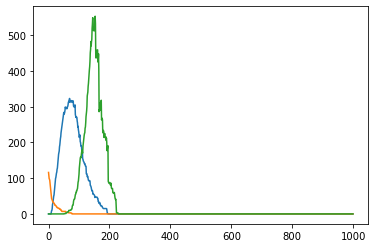

In [156]:
plt.plot(betti_curves[1])
plt.plot(betti_curves[0])
plt.plot(betti_curves[2])

In [136]:
files_f = glob.glob('HCP_AAL_Young_Adult/functional_connectivity/*functional_connectivity.txt')
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [138]:
# The whole 100 individuals Cohort is in this list, each individual is in Cohort[i]
import pandas as pd
Cohort_f=[]
for i in range(0,len(files)):
    df=pd.read_csv(files_f[i],header=None)
    #df = df.iloc[:-1 , :]
    # if needed, some cleaning step could be done in this stage here
    Cohort_f.append(np.abs(df))

In [142]:
Cohort_f[3].to_numpy()

array([[1.        , 0.85619821, 0.09483828, ..., 0.38454427, 0.04030338,
        0.1444114 ],
       [0.85619821, 1.        , 0.06417246, ..., 0.43903974, 0.0300974 ,
        0.15825238],
       [0.09483828, 0.06417246, 1.        , ..., 0.23529313, 0.33551034,
        0.31815958],
       ...,
       [0.38454427, 0.43903974, 0.23529313, ..., 1.        , 0.33223977,
        0.10199161],
       [0.04030338, 0.0300974 , 0.33551034, ..., 0.33223977, 1.        ,
        0.36112676],
       [0.1444114 , 0.15825238, 0.31815958, ..., 0.10199161, 0.36112676,
        1.        ]])

In [158]:
import gudhi as gd # version 3.3.0
from gudhi.representations import Landscape # version 3.3.0
from gudhi.representations import BettiCurve # version 3.3.0
from gudhi.representations import TopologicalVector # version 3.3.0
from gudhi.representations import Entropy

def calculate_persistence(matrix):
    """ Performs filtration (persistent homology) process 
    
    
    Parameters
    ----------
    matrix: connectivity matrix as numpy array
        
    
    Returns
    -------
    pers: persistence of simplicial complex. 
          Type:list of pairs(dimension, pair(birth, death))
    simplex_tree: data structure for representing simplicial complexes
        
        
    """
    rips_complex = gd.RipsComplex(distance_matrix=matrix, max_edge_length=1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=nr_dimensions)
    pers = simplex_tree.persistence()

    return pers, simplex_tree
def persistence_per_dim(simplex_tree, nr_dimension):
    """ Performs filtration (persistent homology) process per dimension
    
    
    Parameters
    ----------
    simplex_tree: data structure for representing simplicial complexes
    nr_dimension: parameter which specifies the number of dimensions to 
        investigate. E.g. 1, 2 or 3. 
    
        
    Returns
    -------
    pers_per_dim: persistence of simplicial complex per dimension. E.g., if 
        3 dimensions: list of 3 lists of pairs(dimension, pair(birth, death))
    
    
    Notes
    -------
    Infinite values likely exist in the filtration process, because some 
    structures never cease existing. This leads to problems for computing 
    TDA metrics per dimension. Therefore, infinite values are substituted
    for the maximum finite values for other structures in the persistence
    in the same dimension. 
    
        
    """

    pers_per_dim = []

    for dimension in range(nr_dimensions):
        pers = simplex_tree.persistence_intervals_in_dimension(dimension)

        # The code below replaces any infinite values with the maximum value
        # from the persistence in dimension 0.

        # Find the maximum value which is not infinite
        if dimension == 0:
            pers = np.where(np.isinf(pers), -1, pers)
            max_val_dim0 = np.max(pers)

        # If non-empty array: replace infinite with maximum value
        if pers.shape != (0,):
            pers = np.where(np.isinf(pers), -1, pers)
            pers = np.where(pers == -1, max_val_dim0, pers)
            pers_per_dim.append(pers)

        # if no topological structures present, append empty array to prevent error
        else:
            pers_per_dim.append(np.zeros([0, 2]))

    return pers_per_dim
def calculate_betti_curves(pers_per_dim):
    """ Calculates Betti curves per dimension

    
    Parameters
    ----------
    pers_per_dim: list of persistence per dimension
        
    
    Returns
    -------
    betti_curves: list of Betti curves per dimension
         
        
    """

    betti_curves = BettiCurve(resolution=resolution,
                              sample_range=[0, 1]).transform(pers_per_dim)

    return betti_curves


def betti(matrix,nr_dimensions,resolution):
    "input: a connectivity matrix"
    "output: Betti curves up to a given number"
    pers, simplex_tree = calculate_persistence(matrix)
    pers_per_dim = persistence_per_dim(simplex_tree, nr_dimensions)
    bc=calculate_betti_curves(pers_per_dim)
    return bc
    
    

In [183]:
resolution=10000

In [220]:
Cohort[0]

array([[0.        , 0.80372168, 0.        , ..., 0.        , 0.06668047,
        0.        ],
       [0.80372168, 0.        , 0.        , ..., 0.        , 0.01184808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06668047, 0.01184808, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [222]:
b_0,b_1,b_2=betti(Cohort[0],2,10000)

In [223]:
b_0

array([0., 0., 0., ..., 0., 0., 0.])

Text(0, 0.5, 'Betti_k')

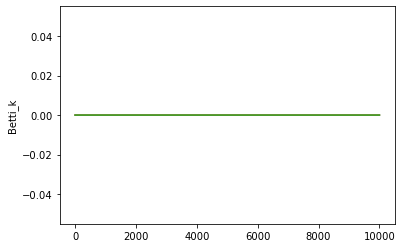

In [224]:
plt.plot(b_0)
plt.plot(b_1)
plt.plot(b_2)
plt.ylabel('Betti_k')

array([[1.        , 0.80372168, 0.        , ..., 0.        , 0.06668047,
        0.        ],
       [0.80372168, 1.        , 0.        , ..., 0.        , 0.01184808,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06668047, 0.01184808, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [188]:
import networkx as nx

In [214]:
Cohort[0]

array([[0.        , 0.80372168, 0.        , ..., 0.        , 0.06668047,
        0.        ],
       [0.80372168, 0.        , 0.        , ..., 0.        , 0.01184808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06668047, 0.01184808, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [189]:
G=nx.from_numpy_matrix(Cohort[0])

In [192]:
Cliques=list(nx.enumerate_all_cliques(G))

In [193]:
Cliques

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [0, 1],
 [0, 16],
 [0, 17],
 [0, 28],
 [0, 29],
 [0, 56],
 [0, 57],
 [0, 63],
 [0, 70],
 [0, 71],
 [0, 72],
 [0, 76],
 [0, 91],
 [0, 92],
 [0, 93],
 [0, 112],
 [0, 114],
 [1, 17],
 

In [194]:
nx.density(G)

0.09055472263868065

In [199]:
kmax=10
def Euler_charac(G, kmax=kmax): 
    """
    
    Parameters
    ----------
    G: networkx graph 
    
    kmax: int
        number of dimensions
    
    Returns
    -------
    summary:
        A list with a topological summary for the graph G with Euler characteristics, tau, and number of cliques for each size
    OBS:
    ---
    This function limits the number of cliques to a maximum kmax
    
    """
    
    #start_time = time.time()
    #main()
    Nodes = len(G)
    
    Cliques = nx.find_cliques(G)
    Limit = max_cliques(Nodes, kmax)
    Cl = []
    while True:
        try:
            for i in range(0,Limit):
                clq = next(Cliques)
                if len(clq) <= kmax: # IF YOU DON'T WANNA USE KMAX JUST COMMENT THIS STEP TO MAKE IT QUICKER
                    Cl.append(clq)
        except StopIteration:
            break
    # If not provided, compute maximal cliques
    #if (C is None) : C = nx.find_cliques(G)
    
    # Sort each clique, make sure it's a tuple
    C = [tuple(sorted(c)) for c in Cl]
    
    
    summary = []
    for k in range(0, max(len(s) for s in C)) :
        # Get all (k+1)-cliques, i.e. k-simplices, from all max cliques mc in C
        # Notice that we are usning set(c) so that we count each clique only once
        Sk = set(c for mc in C for c in itertools.combinations(mc, k+1))
        # Check that each simplex is in increasing order
        #assert(all((list(s) == sorted(s)) for s in Sk))
        # Assign an ID to each simplex, in lexicographic order
        #S.append(dict(zip(sorted(Sk), range(0, len(Sk)))))
        #Appending the number of cliques of size k+1
        summary.append(len(Sk))
    tau = sum(summary) # Tau gives the total number of cliques
    kmax = len(summary) # Kmax is the maximum clique size one can find
    ec = 0 # ec is the Euler characteristics
    for i in range(0,len(summary)):
        if i%2 == 0:
                ec += summary[i]
        if i%2 == 1:
                ec += -summary[i]
        #ec+=(-1)**(k % 2)*k
    #print((k))
    summary.insert(0, kmax)
    summary.insert(0, tau)
    summary.insert(0, ec)
    for i in range(kmax, 30): # I want to include new elements after kmax with zero, to say that there are no simplicies with this size, but all the outputs will be lists with the same size
        summary.insert(kmax+3, 0) # The first guy is chi, the second is tau, the third is kmax
    
    #The output will be summary starting with EC, tau, kmax, clique_0,Clique_1,Clique_2, Clique_3, and so on...
        
    return summary

In [203]:
Euler_charac(G)

[-57,
 1247,
 6,
 116,
 488,
 449,
 162,
 30,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [202]:
%run TDA_Fernando.py

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


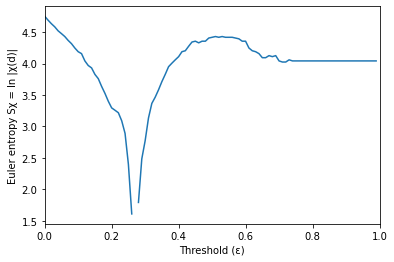

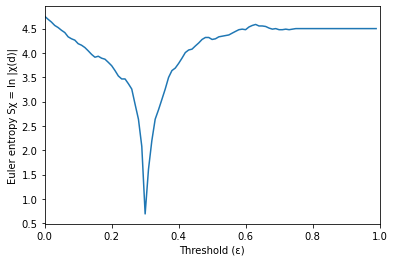

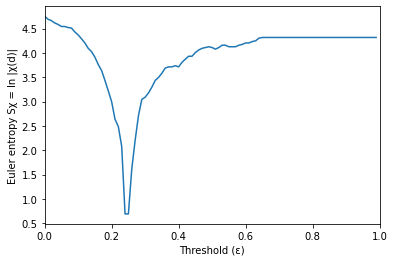

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


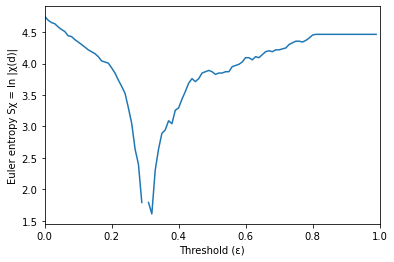

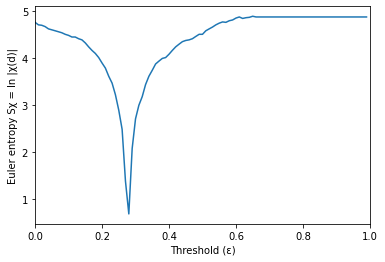

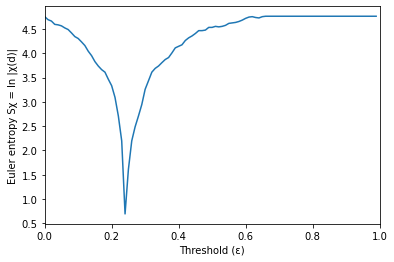

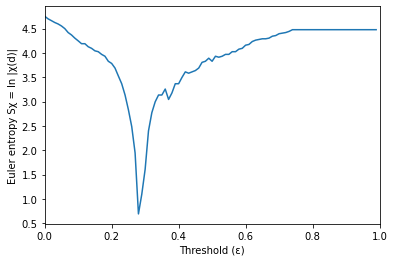

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


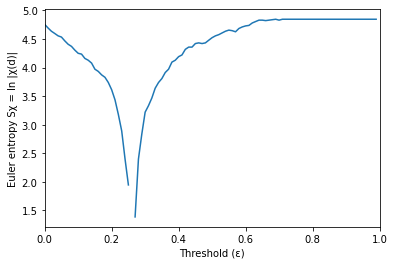

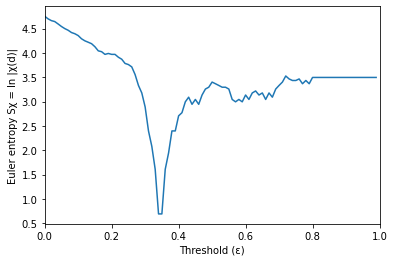

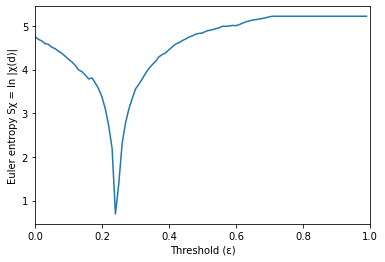

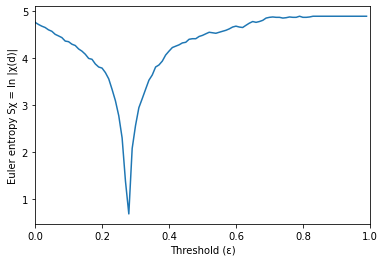

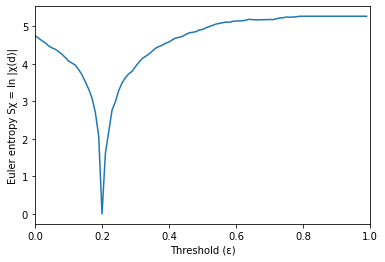

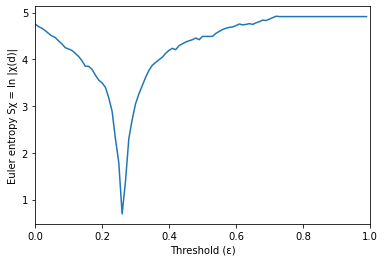

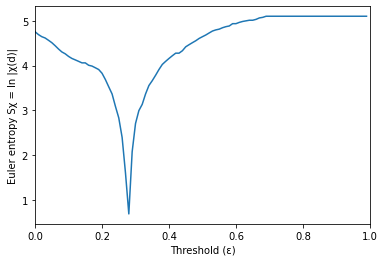

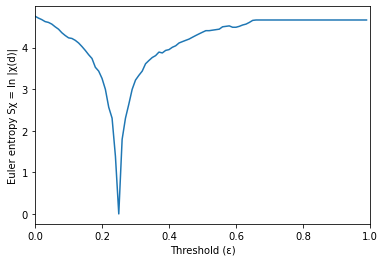

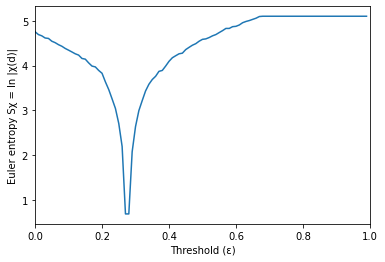

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


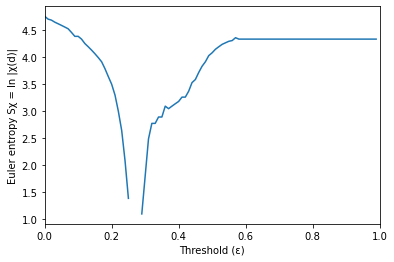

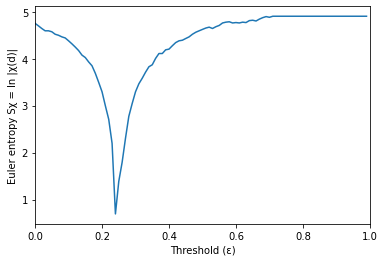

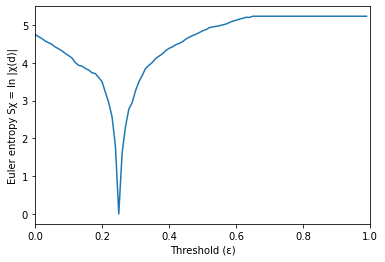

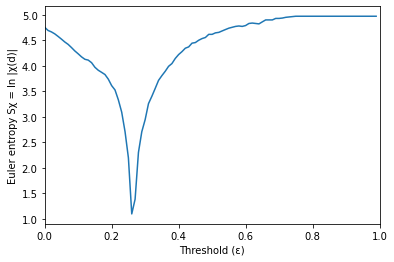

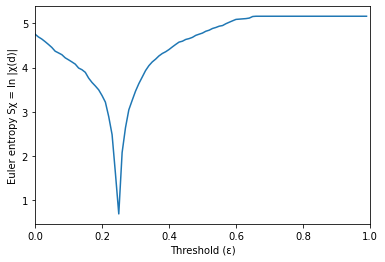

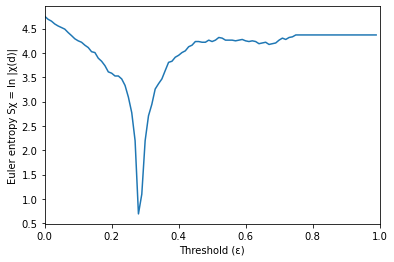

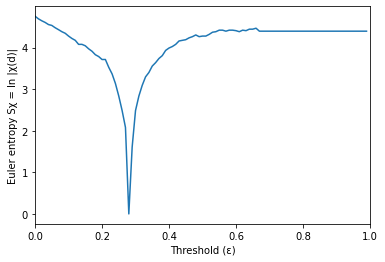

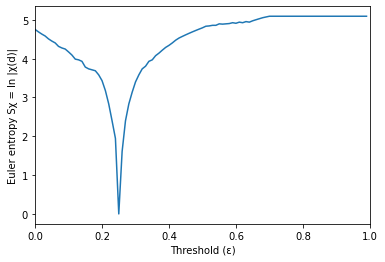

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


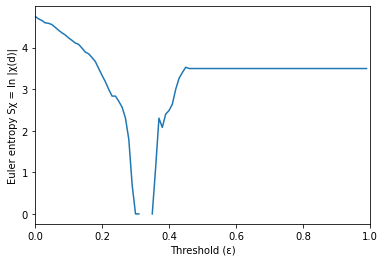

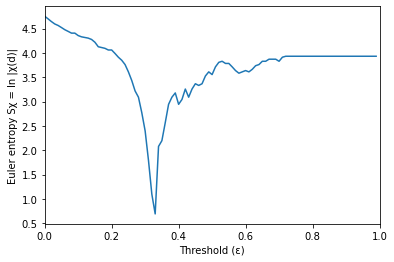

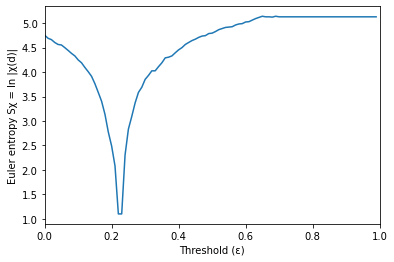

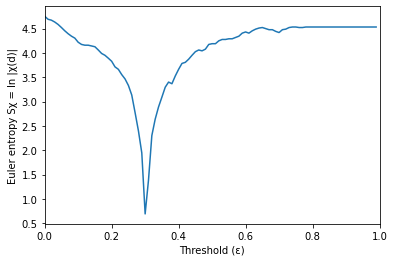

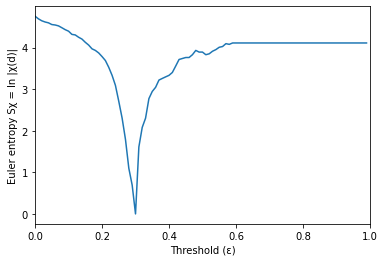

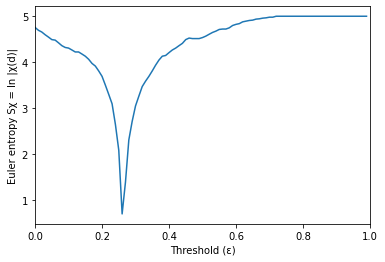

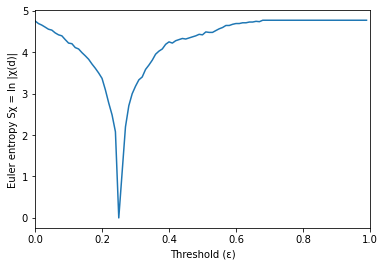

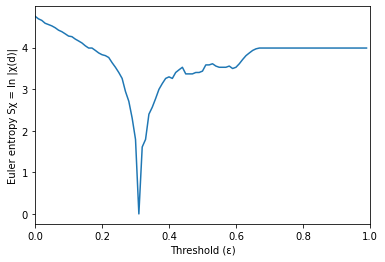

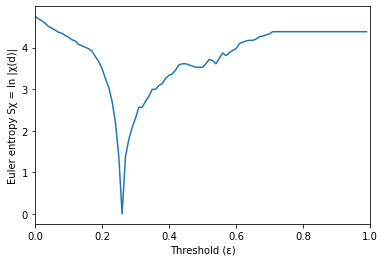

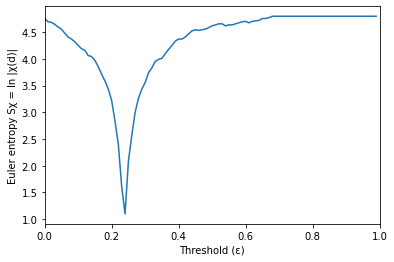

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


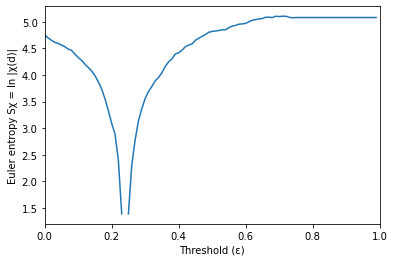

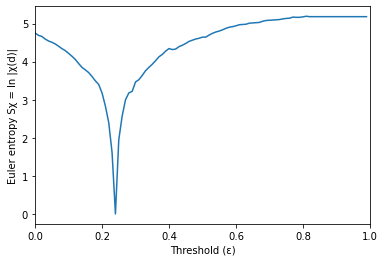

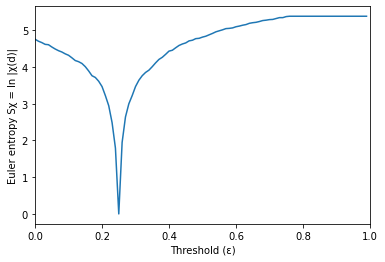

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


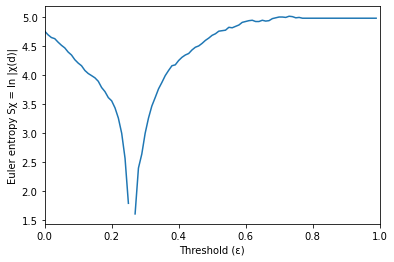

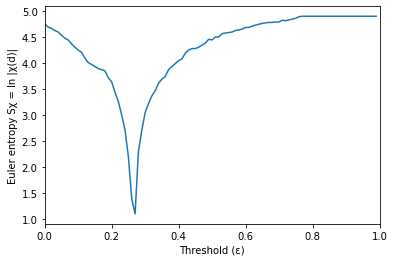

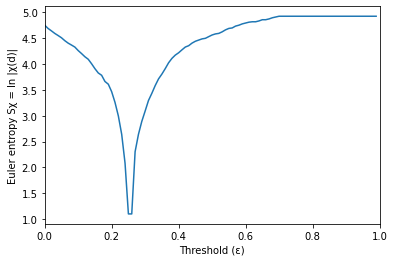

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


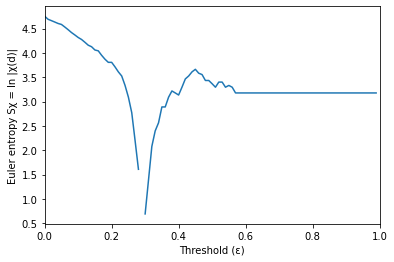

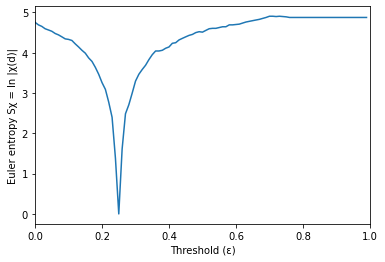

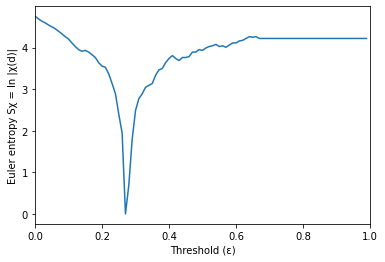

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


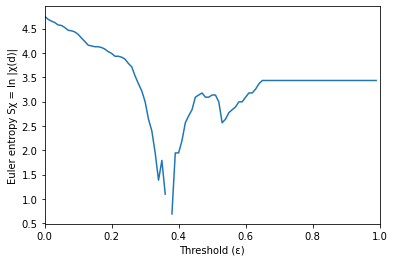

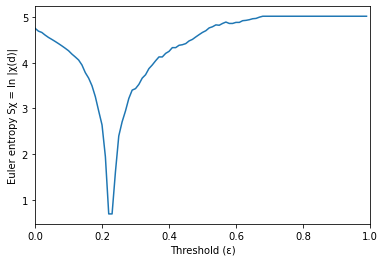

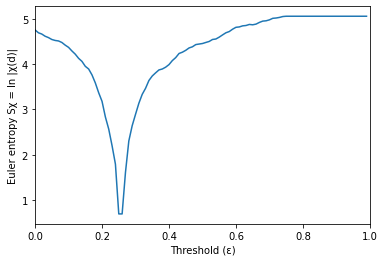

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


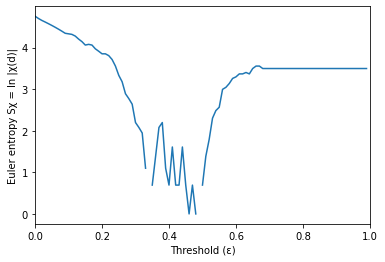

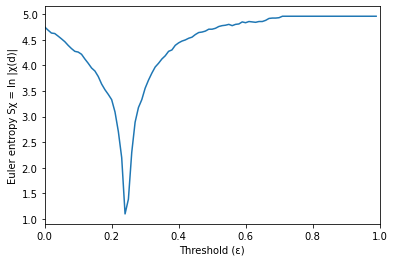

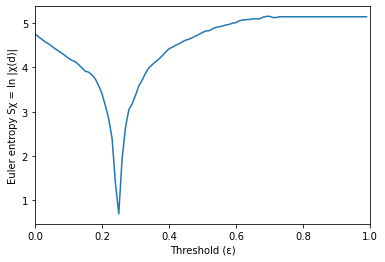

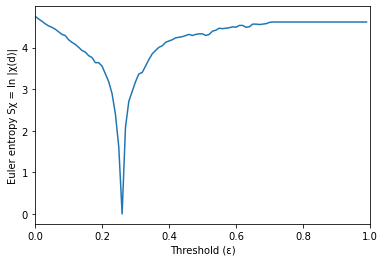

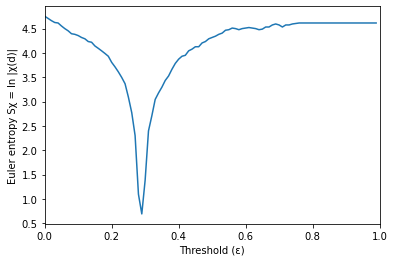

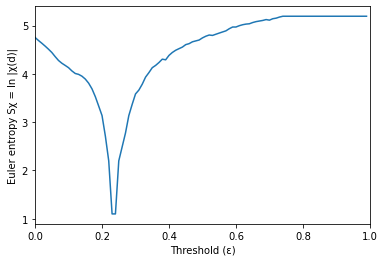

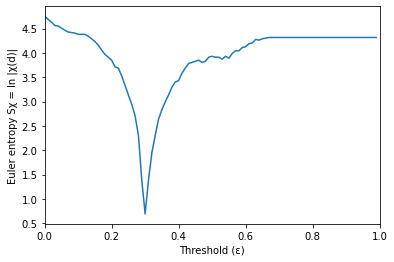

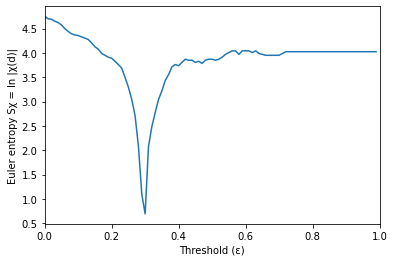

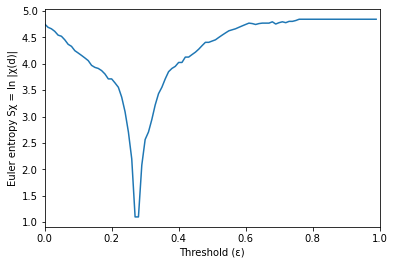

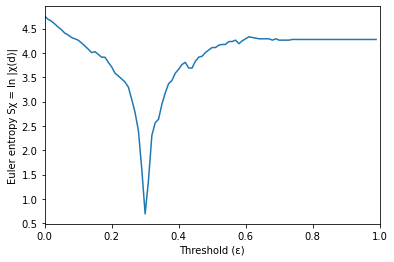

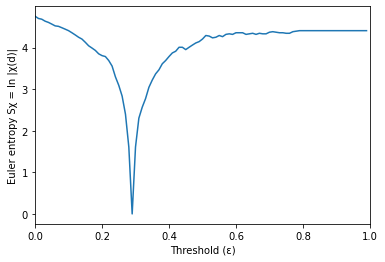

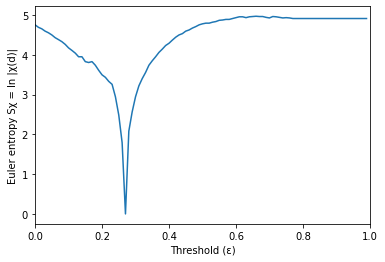

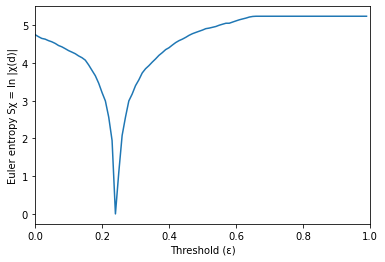

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


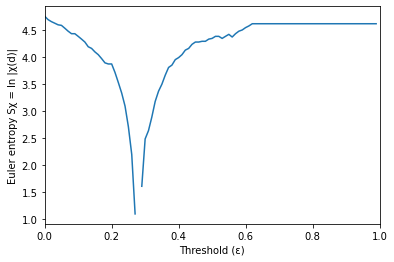

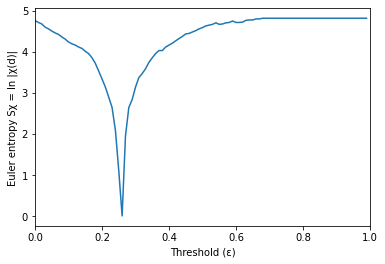

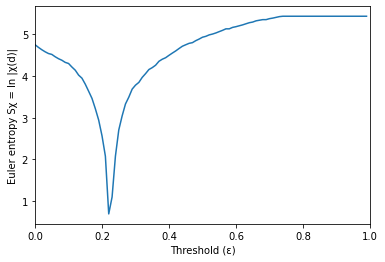

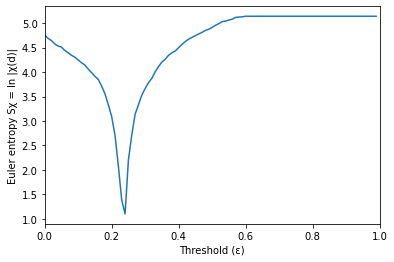

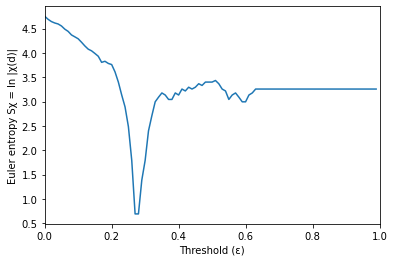

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


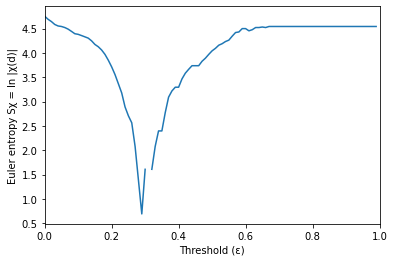

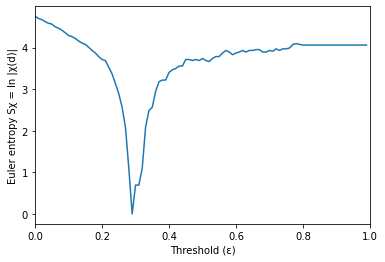

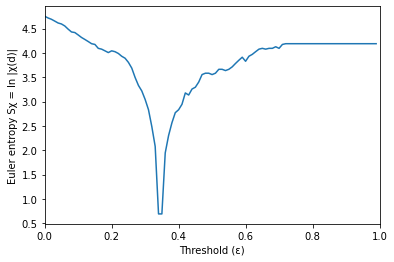

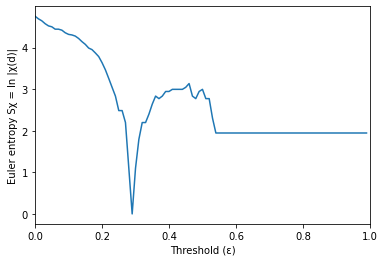

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


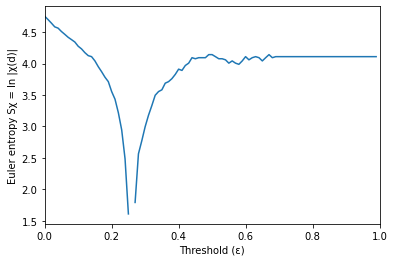

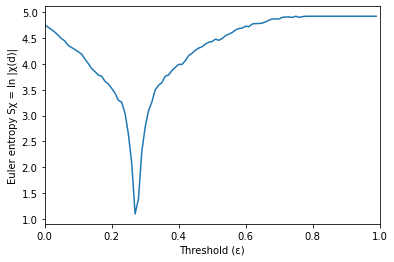

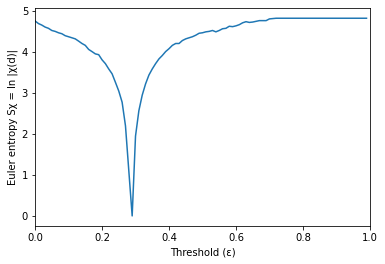

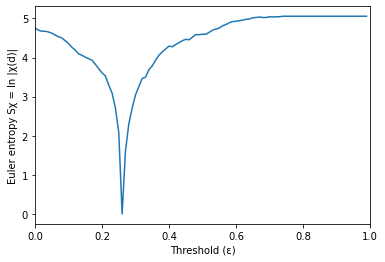

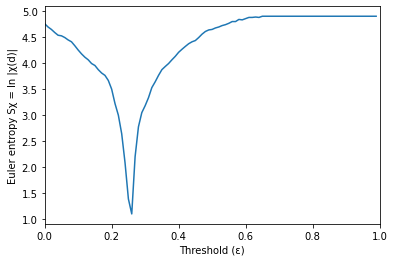

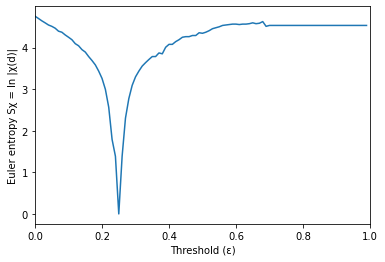

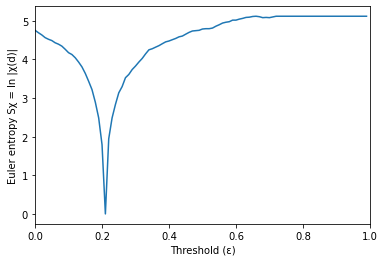

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


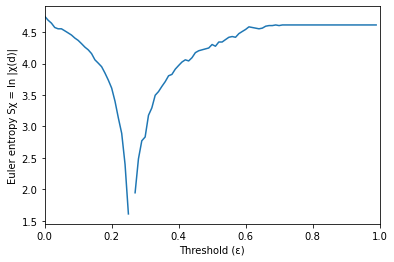

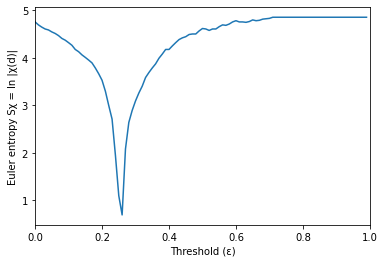

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


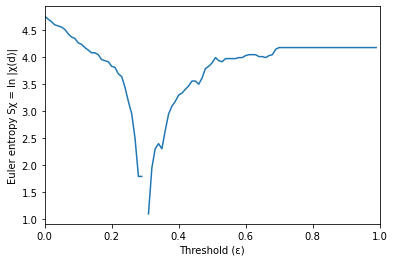

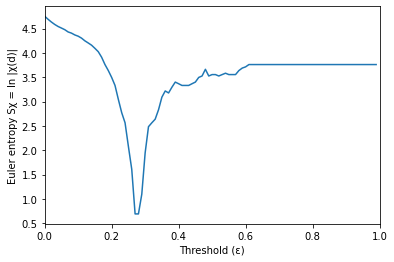

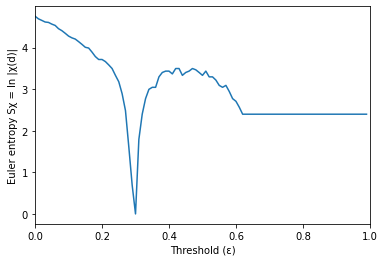

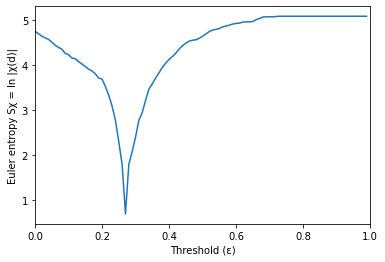

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


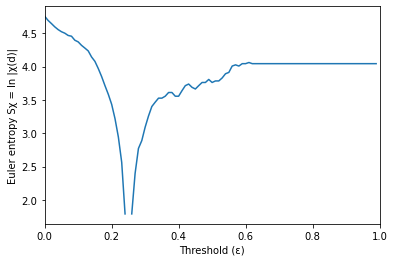

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


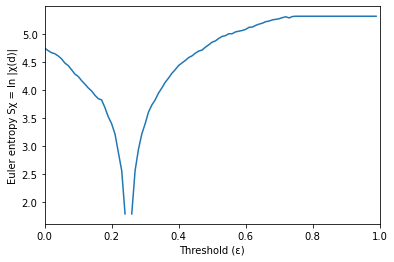

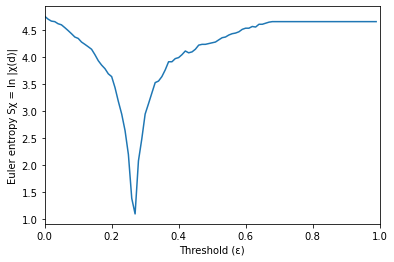

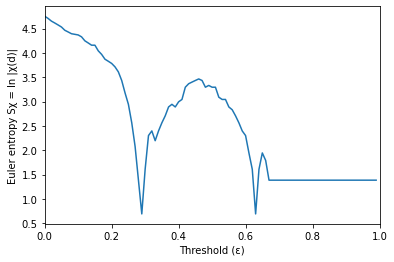

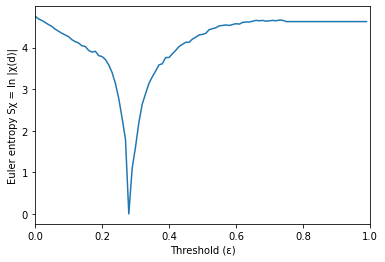

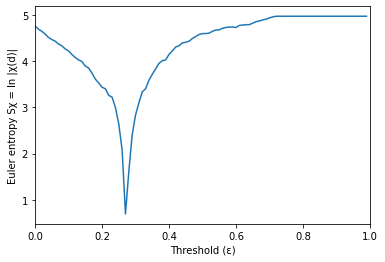

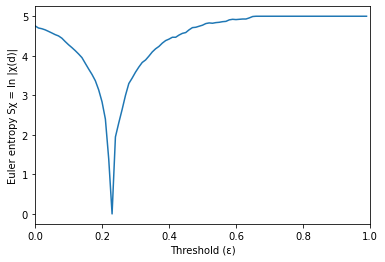

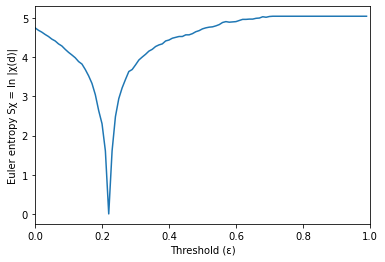

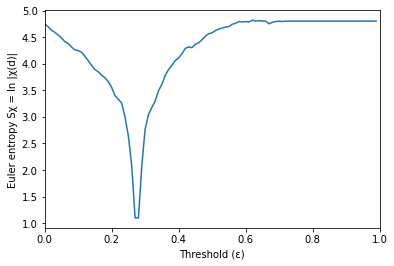

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


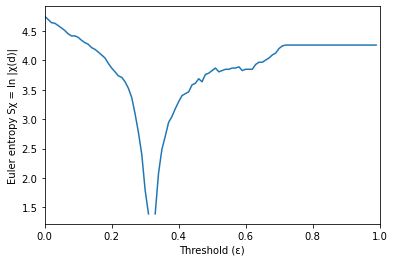

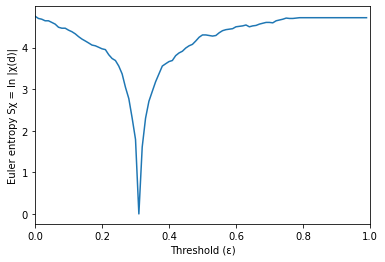

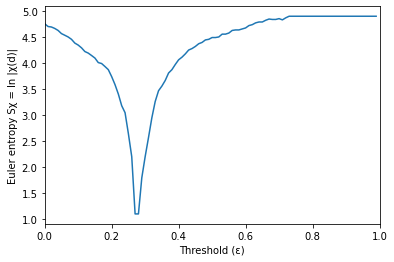

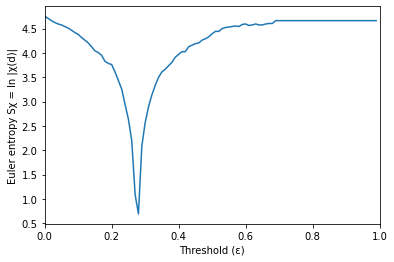

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


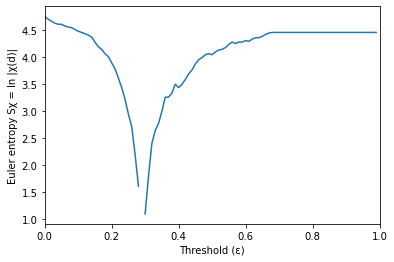

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


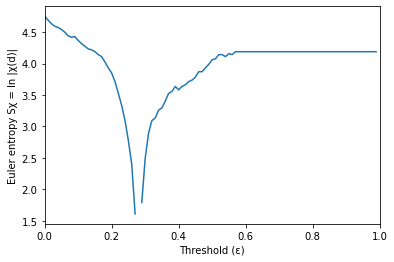

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


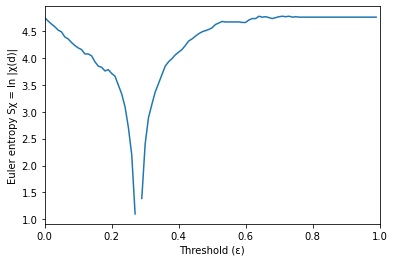

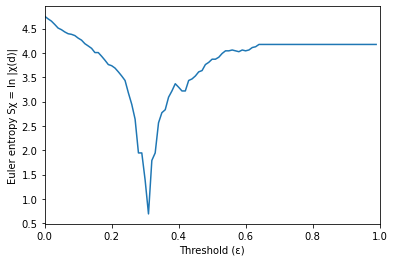

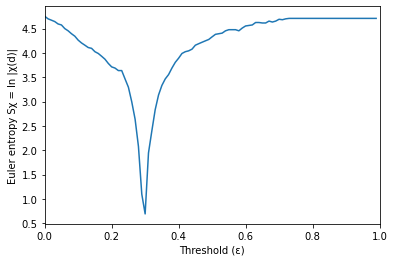

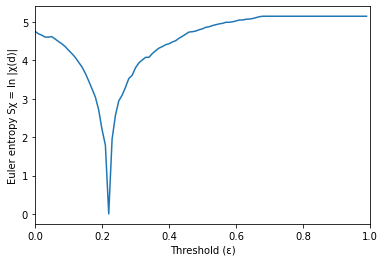

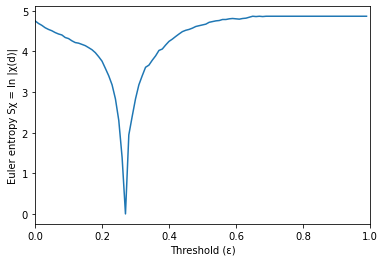

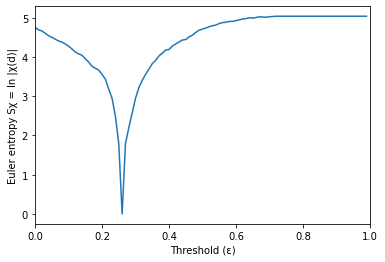

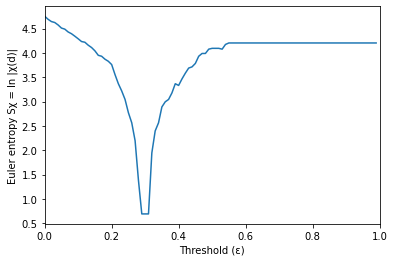

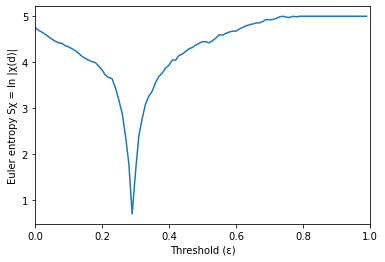

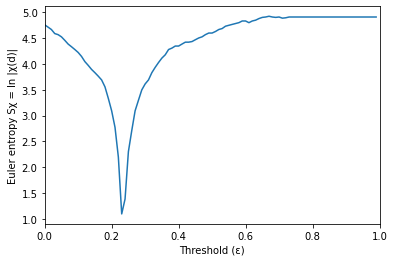

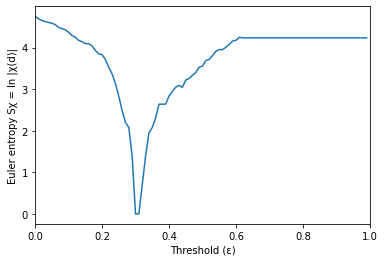

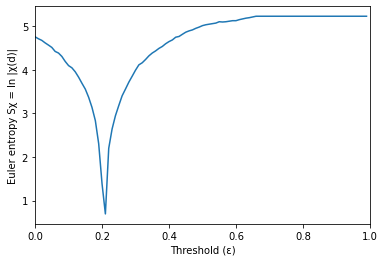

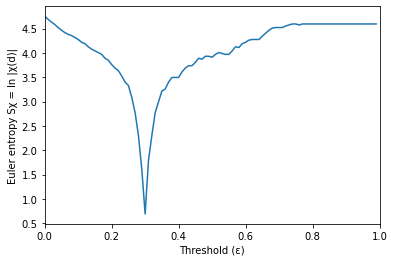

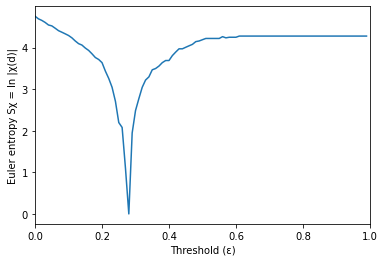

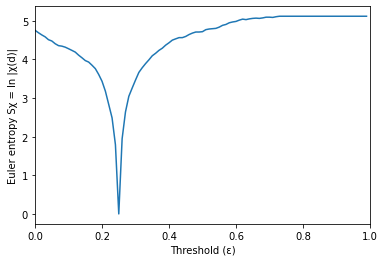

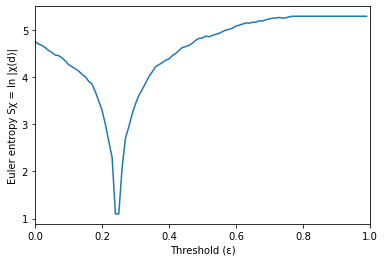

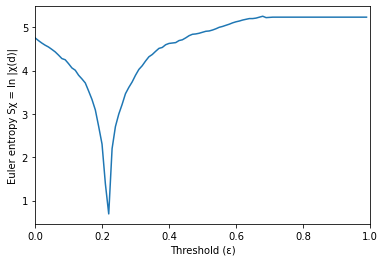

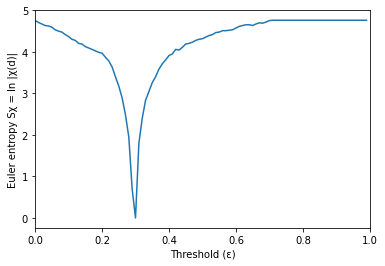

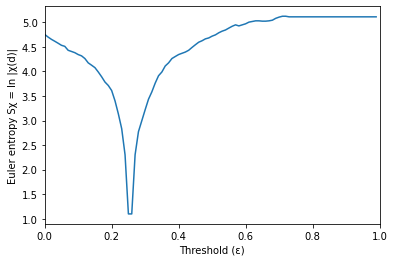

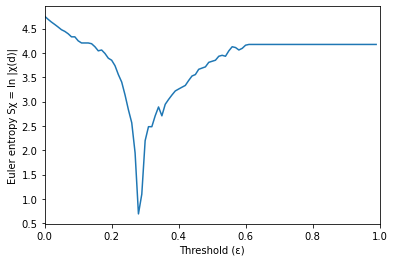

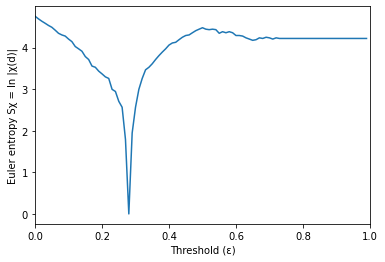

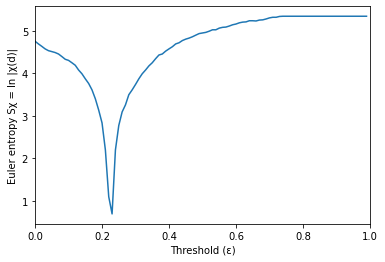

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


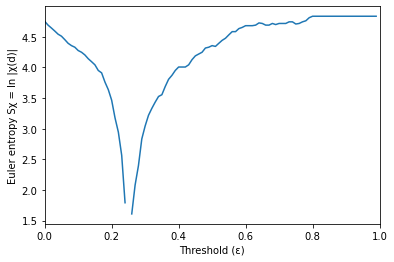

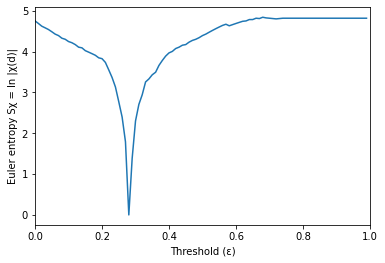

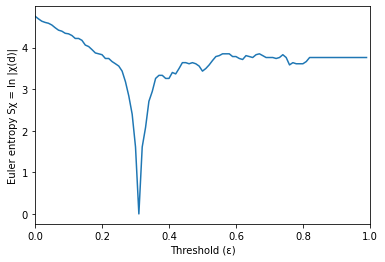

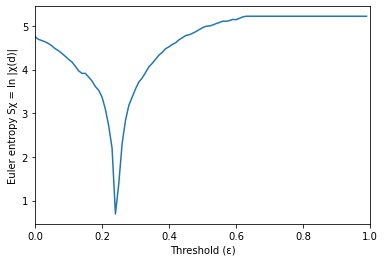

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


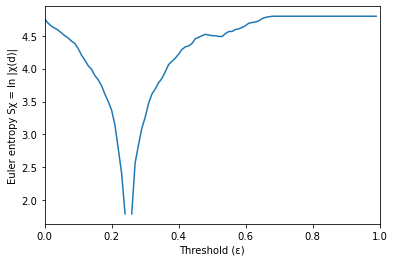

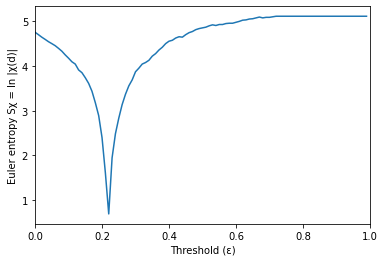

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


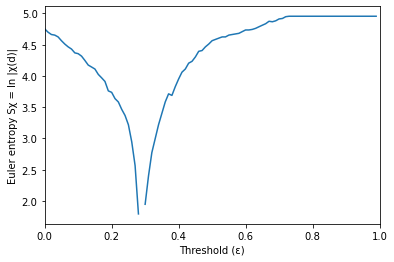

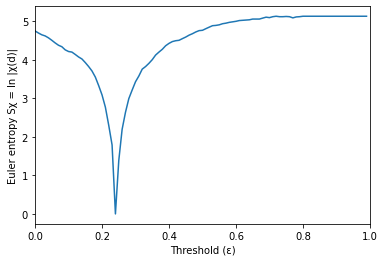

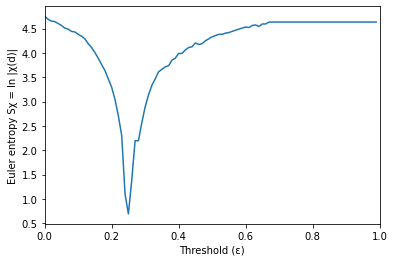

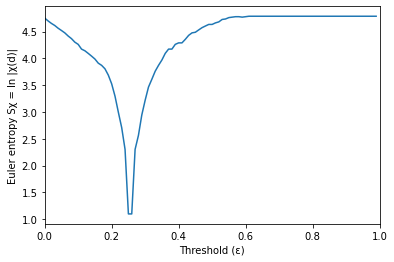

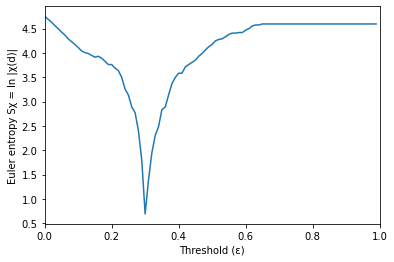

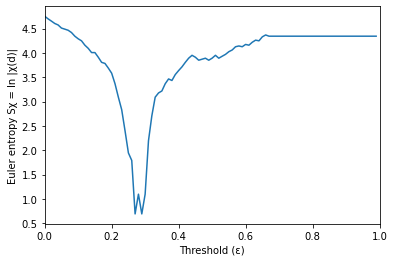

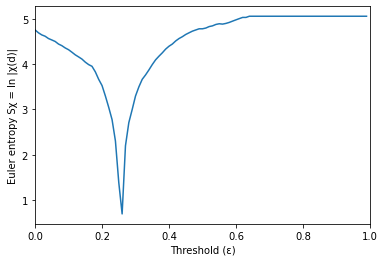

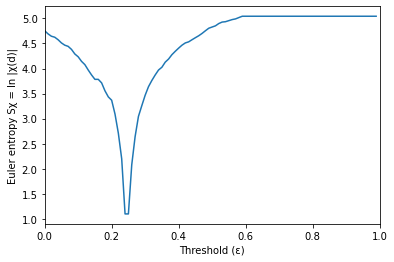

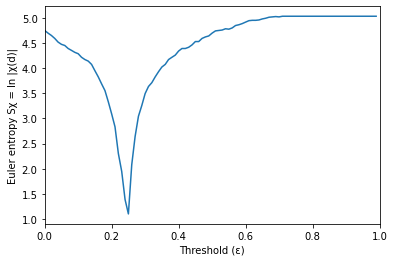

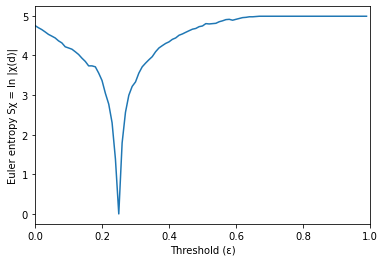

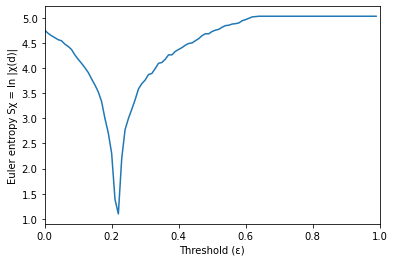

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


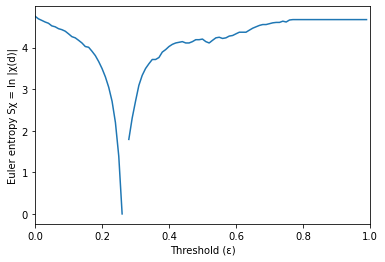

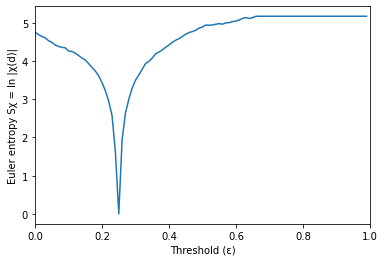

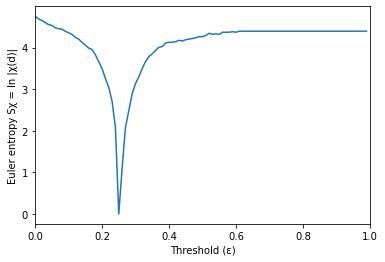

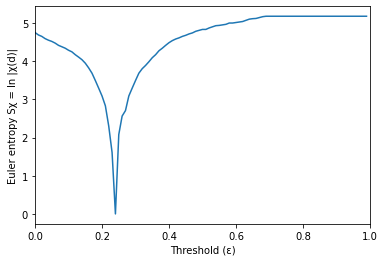

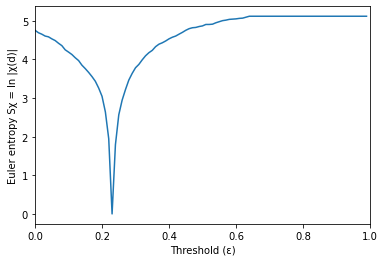

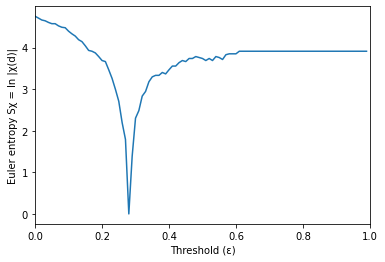

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


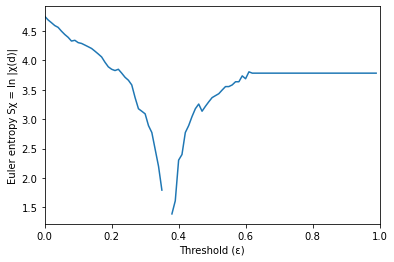

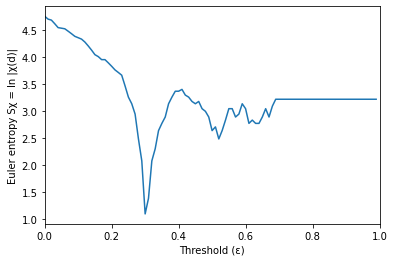

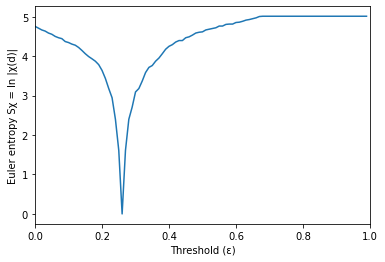

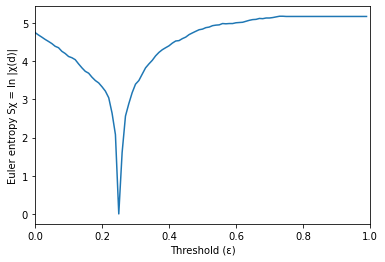

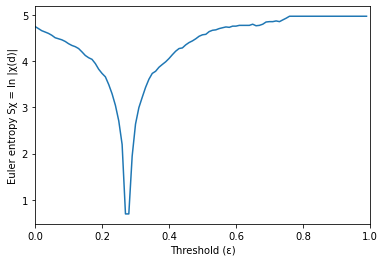

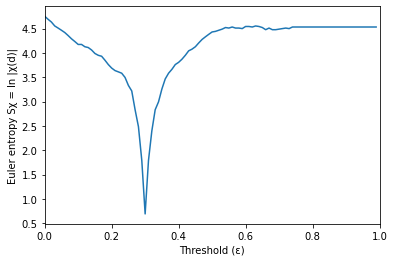

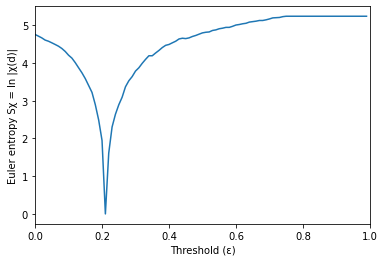

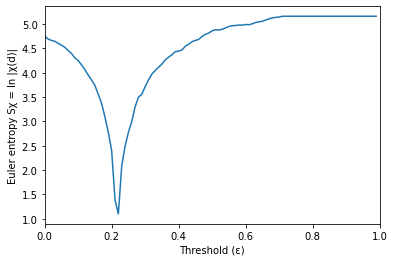

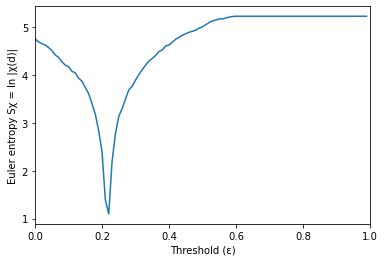

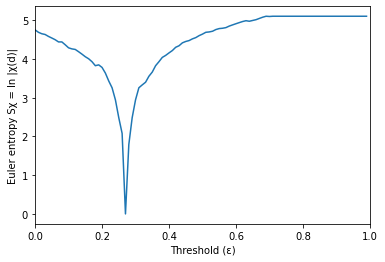

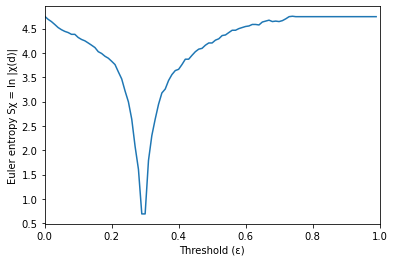

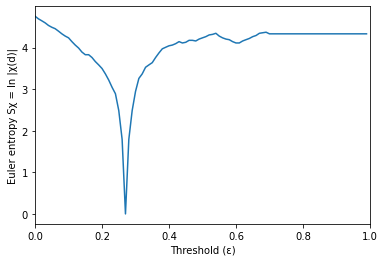

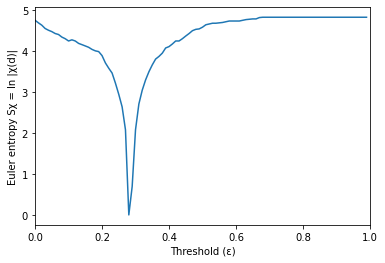

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


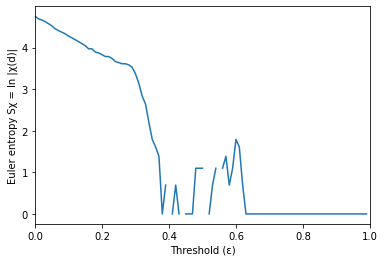

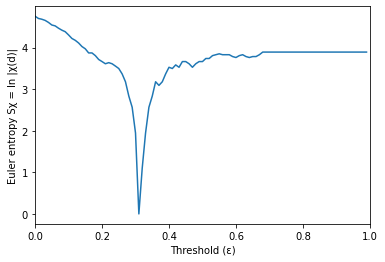

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


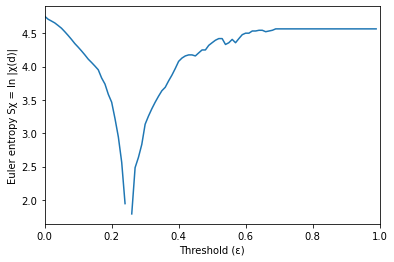

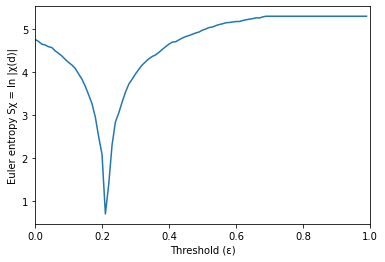

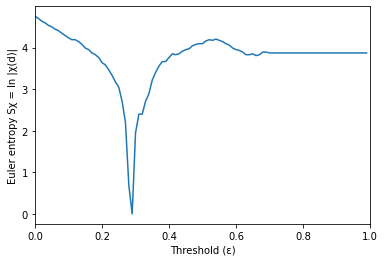

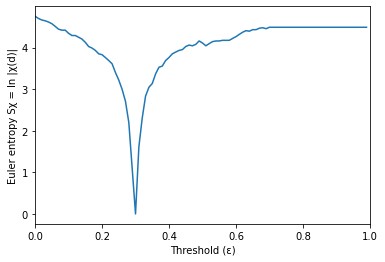

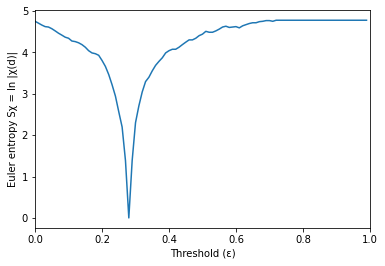

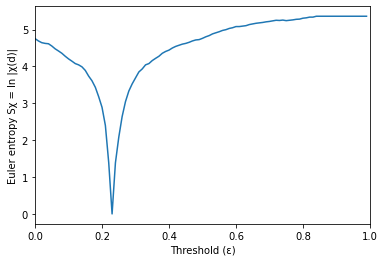

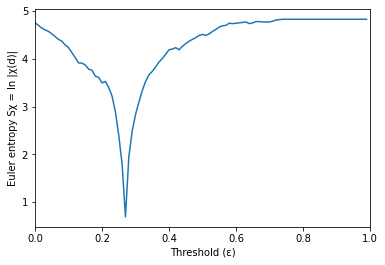

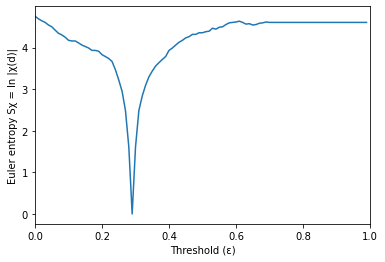

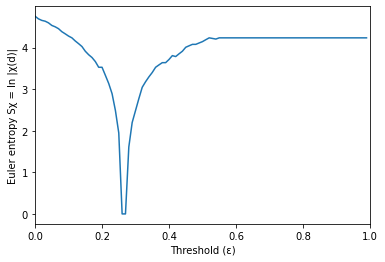

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


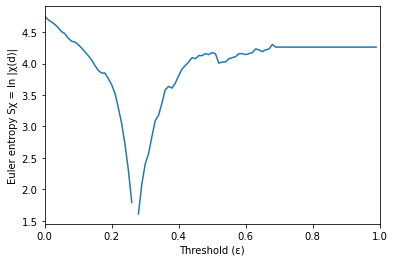

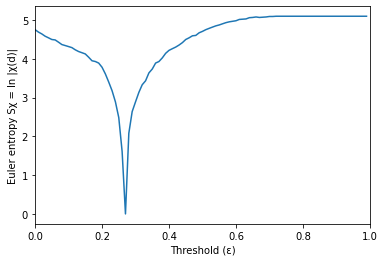

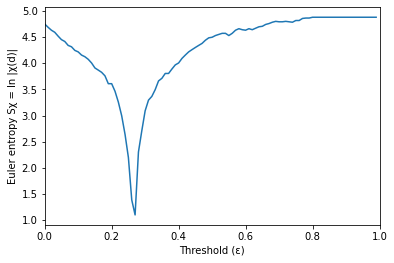

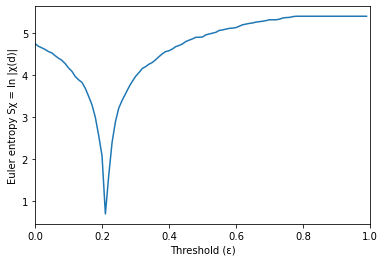

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


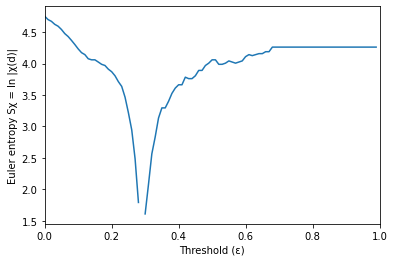

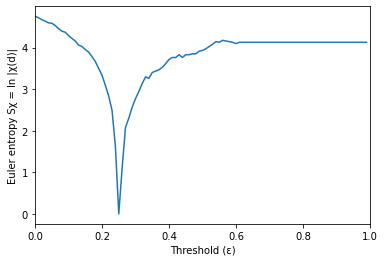

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


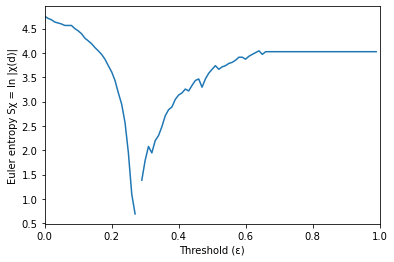

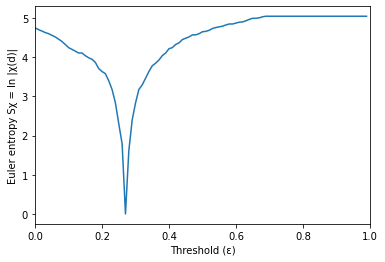

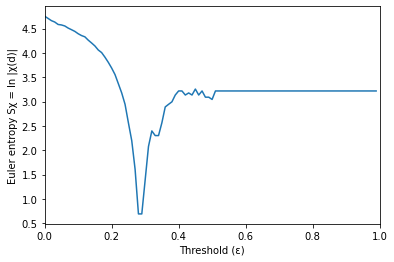

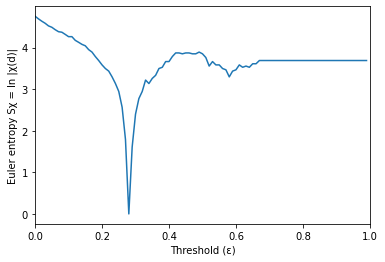

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


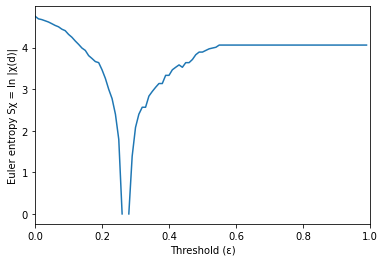

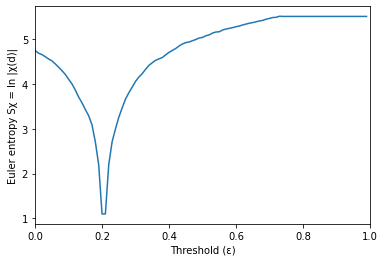

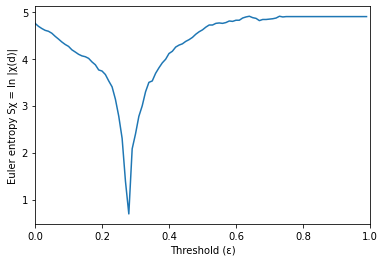

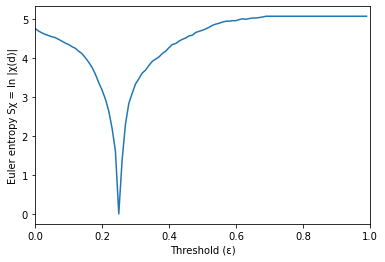

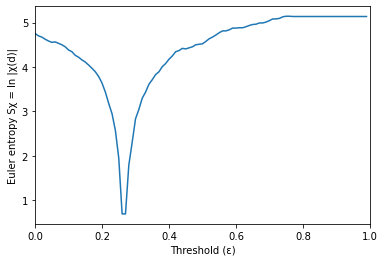

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


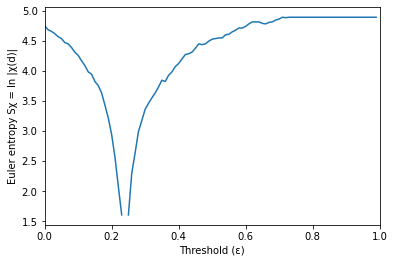

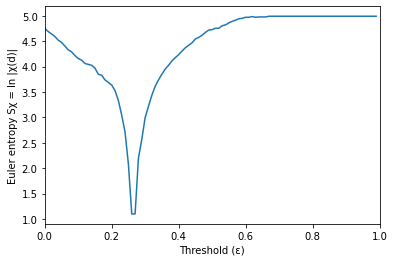

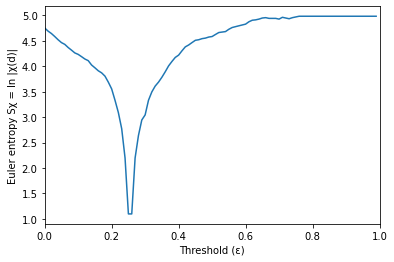

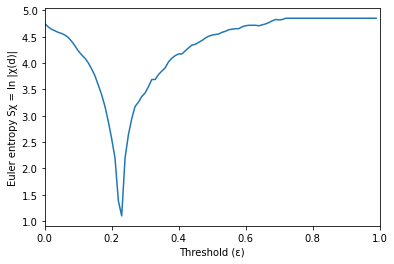

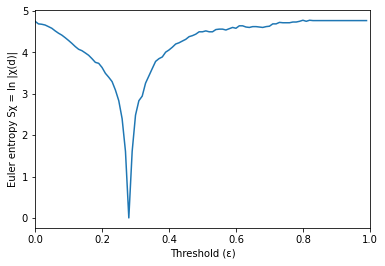

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


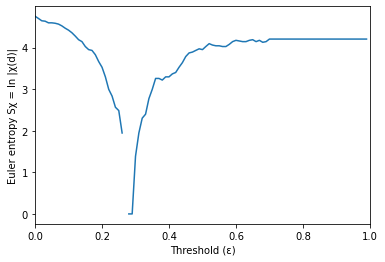

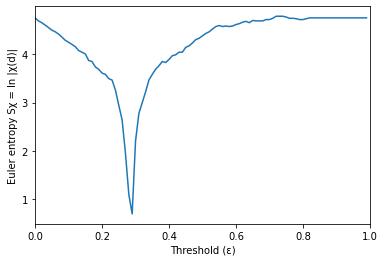

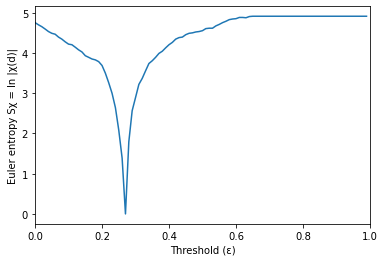

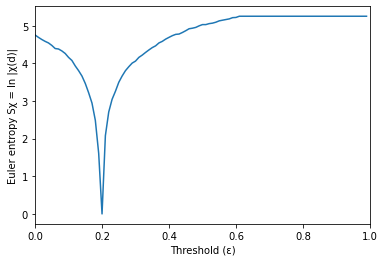

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


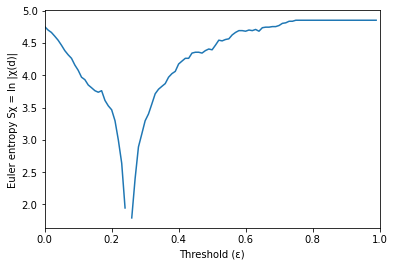

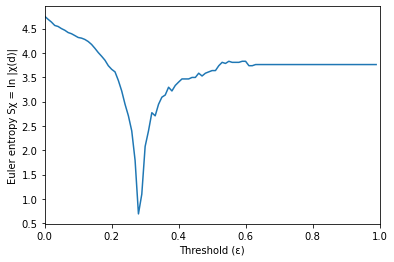

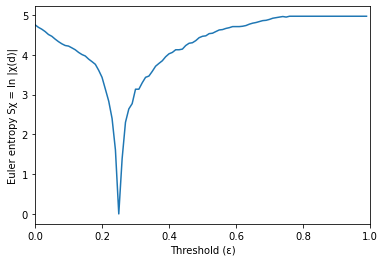

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


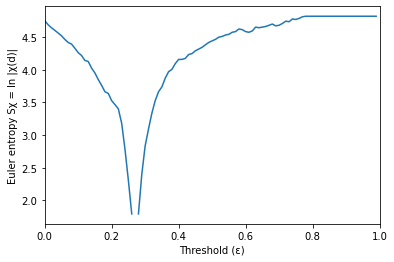

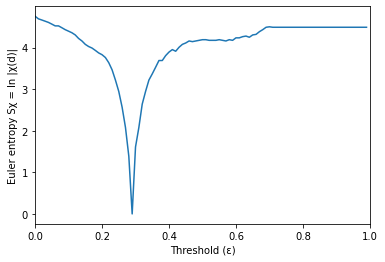

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


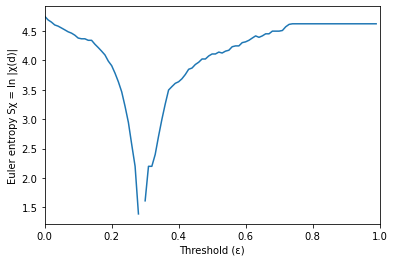

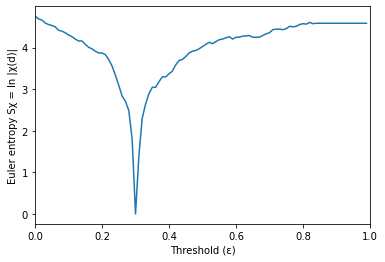

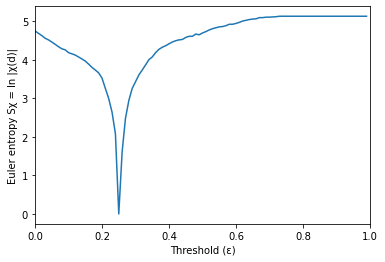

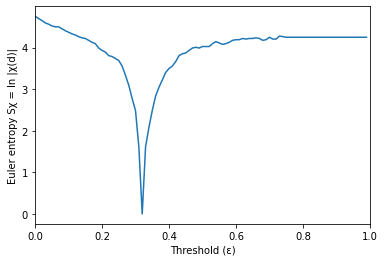

/Users/boltzmann/Dropbox/VUmc/GitHub/HCP_TDA/HCP_YA/TDA_Fernando.py:474: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(Eulerchoice_dens(i, maxvalue, 0)))) # Change to eulerchoice_dens if intended


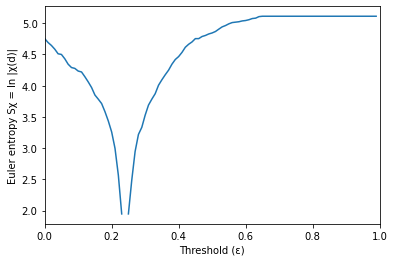

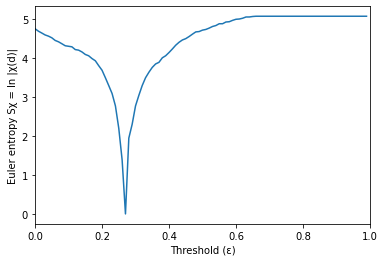

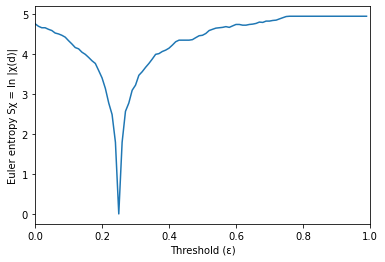

In [210]:
for i in range(0,200):
    plotEuler_den(Cohort[i],100)

In [213]:
np.exp(5)

148.4131591025766